# Generating fake breast cancer images using GAN More Epochs




## Import libraries

In [1]:
!pip install torch

    100% |████████████████████████████████| 753.4MB 19kB/s  eta 0:00:01████                  | 327.7MB 61.5MB/s eta 0:00:07████                  | 332.2MB 62.7MB/s eta 0:00:07   | 373.0MB 64.0MB/s eta 0:00:06███████████████▊  | 698.5MB 32.2MB/s eta 0:00:02.7MB 39.6MB/s eta 0:00:02:01�█████████████████████████▌| 741.1MB 52.0MB/s eta 0:00:01
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install torchvision

    100% |████████████████████████████████| 4.0MB 7.4MB/s eta 0:00:01
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image

## Load Data
* Define constants
* Load breast cancer dataset and apply transforms
* Define dataloader

In [4]:
batch_size = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))])

In [6]:
data = torchvision.datasets.ImageFolder(root='images/', transform=transform)

In [7]:
data

Dataset ImageFolder
    Number of datapoints: 277524
    Root location: images/
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [8]:
data_loader = torch.utils.data.DataLoader(dataset=data,
                                          batch_size=batch_size, 
                                          shuffle=True,
                                          num_workers=1)

## Visualize Data

In [9]:
images, labels = iter(data_loader).next()

In [10]:
images

tensor([[[[ 0.4902,  0.6314,  0.6471,  ...,  0.6235,  0.8275,  0.8431],
          [ 0.5529,  0.4510,  0.4353,  ...,  0.2627,  0.7647,  0.8275],
          [ 0.6549,  0.6941,  0.4353,  ...,  0.6235,  0.7020,  0.8431],
          ...,
          [ 0.8275,  0.8431,  0.5765,  ...,  0.8039,  0.3569,  0.7176],
          [ 0.8588,  0.8275,  0.8196,  ...,  0.7725,  0.7255,  0.2314],
          [ 0.5922,  0.3412,  0.8118,  ...,  0.6706,  0.5137,  0.2157]],

         [[ 0.1216,  0.2627,  0.3098,  ...,  0.1922,  0.2157,  0.1765],
          [ 0.2706,  0.2235,  0.1451,  ..., -0.0353,  0.1373,  0.1765],
          [ 0.3490,  0.3725,  0.0824,  ...,  0.1294,  0.1059,  0.1922],
          ...,
          [ 0.3412,  0.2627,  0.0902,  ...,  0.4510,  0.0431,  0.3647],
          [ 0.6235,  0.2784,  0.2706,  ...,  0.3333,  0.3647, -0.0353],
          [ 0.3098, -0.0745,  0.2941,  ...,  0.2863,  0.1922, -0.0353]],

         [[ 0.4118,  0.5059,  0.4745,  ...,  0.4431,  0.4353,  0.3804],
          [ 0.4824,  0.4431,  

In [11]:
images.shape

torch.Size([10, 3, 50, 50])

In [12]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
len(labels)

10

In [14]:
img = torchvision.utils.make_grid(images)

In [15]:
img = img.detach().numpy()
img = img.clip(0,1)

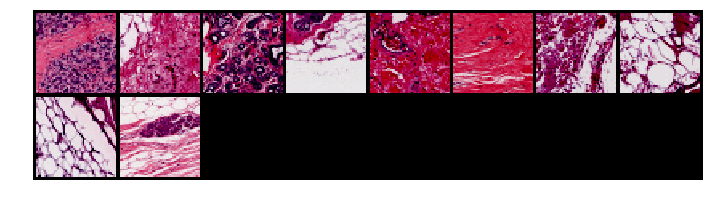

In [16]:
plt.figure(figsize = (12,10))
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

## Define Neural Networks
* Define Hyper-parameters
* Define the Discriminator
* Define the Generator 



In [17]:
latent_size = 64
hidden_size = 256
image_size = 7500
num_epochs = 5

In [18]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [19]:
D

Sequential(
  (0): Linear(in_features=7500, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): LeakyReLU(negative_slope=0.2)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=256, out_features=1, bias=True)
  (7): Sigmoid()
)

In [20]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [21]:
G

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=7500, bias=True)
  (5): Tanh()
)

In [22]:
D = D.to(device)
G = G.to(device)

## Training

In [23]:
bce_loss = nn.BCELoss()

d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [24]:
d_optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0002
    weight_decay: 0
)

In [25]:
g_optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0002
    weight_decay: 0
)

In [26]:
total_step = len(data_loader)

In [27]:
total_step

27753

In [28]:
labels

tensor([1])

In [29]:
images.shape

torch.Size([1, 3, 50, 50])

In [30]:
images = images.reshape(batch_size, -1).to(device)
print(images.shape)

torch.Size([1, 7500])


In [31]:
# Create the labels which are later used as input for the BCE loss
real_labels = torch.ones(batch_size, 1).to(device)
fake_labels = torch.zeros(batch_size, 1).to(device)
print(real_labels.shape)
print(fake_labels.shape)

torch.Size([1, 1])
torch.Size([1, 1])


In [32]:
outputs = D(images)

In [33]:
print(len(outputs))

1


In [34]:
d_loss_real = bce_loss(outputs, real_labels)

In [35]:
print(d_loss_real)

tensor(0.7943, grad_fn=<BinaryCrossEntropyBackward>)


In [36]:
real_score = outputs

In [37]:
print(real_score)

tensor([[0.4519]], grad_fn=<SigmoidBackward>)


In [38]:
z = torch.randn(batch_size, latent_size).to(device)

In [39]:
print(z)

tensor([[ 1.0280, -0.2098, -0.9568,  0.9216, -0.1451,  0.5356,  0.1698,  0.0453,
         -2.3202, -0.6260, -0.2418, -0.1491,  1.1234, -0.4269,  0.6416,  2.4630,
         -1.8340, -0.2242,  1.4740, -2.0403, -2.1382,  2.0457,  0.0434,  0.7109,
          1.3661,  1.5613, -0.4620, -1.1418, -0.1227, -0.5499,  0.4124, -1.3245,
         -1.0571,  0.1159, -0.3990,  0.1550,  1.6833,  0.4359,  1.4917, -0.6023,
         -2.4103, -1.0730,  0.2340, -0.0766,  0.2058, -0.2319,  0.5317, -1.1781,
          0.5906,  1.0022,  0.9449, -0.0627, -1.4318,  0.2776,  1.0941, -0.3862,
         -1.0756, -0.2027, -1.4715, -1.4899, -0.3304, -0.1877, -0.9097,  1.4733]])


In [40]:
fake_images = G(z)

In [41]:
print(fake_images)

tensor([[ 0.0616, -0.0647, -0.0359,  ..., -0.0132, -0.0684, -0.0900]],
       grad_fn=<TanhBackward>)


In [42]:
outputs = D(fake_images)

In [43]:
outputs

tensor([[0.4883]], grad_fn=<SigmoidBackward>)

In [44]:
d_loss_fake = bce_loss(outputs, fake_labels)

In [45]:
print(d_loss_fake)

tensor(0.6700, grad_fn=<BinaryCrossEntropyBackward>)


In [46]:
fake_score = outputs

In [47]:
print(fake_score)

tensor([[0.4883]], grad_fn=<SigmoidBackward>)


In [48]:
d_loss = d_loss_real + d_loss_fake

In [49]:
print(d_loss)

tensor(1.4643, grad_fn=<AddBackward0>)


In [50]:
d_optimizer.zero_grad()

In [51]:
g_optimizer.zero_grad()

In [52]:
d_loss.backward()

In [53]:
d_optimizer.step()

In [54]:
z = torch.randn(batch_size, latent_size).to(device)

In [55]:
print(z)

tensor([[ 2.0072,  0.2116,  0.6364, -0.4439,  0.2871, -1.6185,  0.5285, -1.1037,
          0.1427, -0.1575, -0.5939,  1.6060, -1.3063, -1.3693, -0.5632,  0.6483,
          0.6712,  0.5843, -1.6500, -0.7645, -0.7505, -1.5368, -0.6725,  0.7145,
          1.7756,  0.2455,  0.4599,  1.7803,  0.7759, -0.5751, -0.1330,  0.0847,
          0.3082, -0.9478, -0.2113,  0.0546, -0.2151, -0.6434, -0.1208, -1.3174,
          0.6626, -0.5169,  0.4373,  0.2034, -0.0251, -0.5383, -0.4060, -2.0236,
         -1.3511, -1.0847,  0.0465,  1.1219,  1.4720, -1.6944,  0.5847,  1.3928,
          0.7661,  1.7165, -0.5117, -0.8677, -0.0340, -1.0822,  0.0198, -0.0918]])


In [56]:
fake_images = G(z)

In [57]:
print(fake_images)

tensor([[ 0.0934, -0.0055, -0.0384,  ...,  0.0506, -0.1357,  0.0382]],
       grad_fn=<TanhBackward>)


In [58]:
outputs = D(fake_images)

In [59]:
print(outputs)

tensor([[0.4806]], grad_fn=<SigmoidBackward>)


In [60]:
g_loss = bce_loss(outputs, real_labels)

In [61]:
print(g_loss)

tensor(0.7326, grad_fn=<BinaryCrossEntropyBackward>)


In [62]:
d_optimizer.zero_grad()

In [63]:
g_optimizer.zero_grad()

In [64]:
g_loss.backward()

In [65]:
g_optimizer.step()

In [66]:
images.shape

torch.Size([1, 7500])

In [67]:
len(data_loader)

277524

In [ ]:
for epoch in range(num_epochs):
    for i in range(0,len(data_loader)):
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()))
        fake_images = fake_images.reshape(fake_images.size(0), 3, 50, 50)

Epoch [0/100], Step [200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [1000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [1200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [1400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [1600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [1800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [2000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0

Epoch [0/100], Step [29600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [29800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [30000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [30200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [30400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [30600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [30800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [31000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [31200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [31400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [31600/277524], d_loss: 1.4643, g_loss: 

Epoch [0/100], Step [56600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [56800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [57000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [57200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [57400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [57600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [57800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [58000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [58200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [58400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [58600/277524], d_loss: 1.4643, g_loss: 

Epoch [0/100], Step [83800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [84000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [84200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [84400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [84600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [84800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [85000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [85200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [85400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [85600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [85800/277524], d_loss: 1.4643, g_loss: 

Epoch [0/100], Step [111000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [111200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [111400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [111600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [111800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [112000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [112200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [112400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [112600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [112800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [113000/277524], d_loss: 1.464

Epoch [0/100], Step [138200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [138400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [138600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [138800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [139000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [139200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [139400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [139600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [140200/277524], d_loss: 1.464

Epoch [0/100], Step [165400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [165600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [165800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [166000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [166200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [166400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [166600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [166800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [167000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [167400/277524], d_loss: 1.464

Epoch [0/100], Step [192600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [192800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [193000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [193200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [193400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [193600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [193800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [194000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [194200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [194400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [194600/277524], d_loss: 1.464

Epoch [0/100], Step [219600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [219800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [220000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [220200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [220400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [220600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [220800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [221000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [221200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [221400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [221600/277524], d_loss: 1.464

Epoch [0/100], Step [246000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [246200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [246400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [246600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [246800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [247000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [247200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [247400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [247600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [247800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [248000/277524], d_loss: 1.464

Epoch [0/100], Step [273000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [273200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [273400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [273600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [273800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [274000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [274200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [274400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [274600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [274800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [0/100], Step [275000/277524], d_loss: 1.464

Epoch [1/100], Step [22200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [22400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [22600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [22800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [23000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [23200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [23400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [23600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [23800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [24000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [24200/277524], d_loss: 1.4643, g_loss: 

Epoch [1/100], Step [49400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [49600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [49800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [50000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [50200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [50400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [50600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [50800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [51000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [51200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [51400/277524], d_loss: 1.4643, g_loss: 

Epoch [1/100], Step [76400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [76600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [76800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [77000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [77200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [77400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [77600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [77800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [78000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [78200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [78400/277524], d_loss: 1.4643, g_loss: 

Epoch [1/100], Step [103600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [103800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [104000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [104200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [104400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [104600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [104800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [105000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [105200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [105400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [105600/277524], d_loss: 1.464

Epoch [1/100], Step [130800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [131000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [131200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [131400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [131600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [131800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [132000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [132200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [132400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [132600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [132800/277524], d_loss: 1.464

Epoch [1/100], Step [158000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [158200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [158400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [158600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [158800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [159000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [159200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [159400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [159600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [159800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [160000/277524], d_loss: 1.464

Epoch [1/100], Step [185000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [185200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [185400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [185600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [185800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [186000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [186200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [186400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [186600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [186800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [187000/277524], d_loss: 1.464

Epoch [1/100], Step [212000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [212200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [212400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [212600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [212800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [213000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [213200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [213400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [213600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [213800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [214000/277524], d_loss: 1.464

Epoch [1/100], Step [239400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [239600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [239800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [240000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [240200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [240400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [240600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [240800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [241000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [241200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [241400/277524], d_loss: 1.464

Epoch [1/100], Step [266800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [267000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [267200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [267400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [267600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [267800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [268000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [268200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [268400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [268600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [1/100], Step [268800/277524], d_loss: 1.464

Epoch [2/100], Step [16000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [16200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [16400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [16600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [16800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [17000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [17200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [17400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [17600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [17800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [18000/277524], d_loss: 1.4643, g_loss: 

Epoch [2/100], Step [43200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [43400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [43600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [43800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [44000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [44200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [44400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [44600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [44800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [45000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [45200/277524], d_loss: 1.4643, g_loss: 

Epoch [2/100], Step [70200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [70400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [70600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [70800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [71000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [71200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [71400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [71600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [71800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [72000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [72200/277524], d_loss: 1.4643, g_loss: 

Epoch [2/100], Step [97600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [97800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [98000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [98200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [98400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [98600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [98800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [99000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [99200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [99400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [99600/277524], d_loss: 1.4643, g_loss: 

Epoch [2/100], Step [124600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [124800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [125000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [125200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [125400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [125600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [125800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [126000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [126200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [126400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [126600/277524], d_loss: 1.464

Epoch [2/100], Step [151800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [152000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [152200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [152400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [152600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [152800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [153000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [153200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [153400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [153600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [153800/277524], d_loss: 1.464

Epoch [2/100], Step [179000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [179200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [179400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [179600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [179800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [180000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [180200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [180400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [180600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [180800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [181000/277524], d_loss: 1.464

Epoch [2/100], Step [206400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [206600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [206800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [207000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [207200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [207400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [207600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [207800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [208000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [208200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [208400/277524], d_loss: 1.464

Epoch [2/100], Step [233400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [233600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [233800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [234000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [234200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [234400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [234600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [234800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [235000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [235200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [235400/277524], d_loss: 1.464

Epoch [2/100], Step [260400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [260600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [260800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [261000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [261200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [261400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [261600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [261800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [262000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [262200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [2/100], Step [262400/277524], d_loss: 1.464

Epoch [3/100], Step [9200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [9400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [9600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [9800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [10000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [10200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [10400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [10600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [10800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [11000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [11200/277524], d_loss: 1.4643, g_loss: 0.73

Epoch [3/100], Step [36400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [36600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [36800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [37000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [37200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [37400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [37600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [38000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [38200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [38400/277524], d_loss: 1.4643, g_loss: 

Epoch [3/100], Step [63600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [63800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [64000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [64200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [64400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [64600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [64800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [65200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [65400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [65600/277524], d_loss: 1.4643, g_loss: 

Epoch [3/100], Step [90600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [90800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [91000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [91200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [91400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [91600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [91800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [92400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [92600/277524], d_loss: 1.4643, g_loss: 

Epoch [3/100], Step [117600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [117800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [118000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [118200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [118400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [118600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [118800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [119000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [119200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [119400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [119600/277524], d_loss: 1.464

Epoch [3/100], Step [145400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [145600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [145800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [146000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [146200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [146400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [146600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [146800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [147000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [147200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [147400/277524], d_loss: 1.464

Epoch [3/100], Step [170800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [171000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [171200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [171400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [171600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [171800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [172000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [172200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [172400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [172600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [172800/277524], d_loss: 1.464

Epoch [3/100], Step [197600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [197800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [198000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [198200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [198400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [198600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [198800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [199000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [199200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [199400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [199600/277524], d_loss: 1.464

Epoch [3/100], Step [225200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [225400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [225600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [225800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [226000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [226200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [226400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [226600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [226800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [227000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [227200/277524], d_loss: 1.464

Epoch [3/100], Step [252800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [253000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [253200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [253400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [253600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [253800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [254000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [254200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [254400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [254600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [3/100], Step [254800/277524], d_loss: 1.464

Epoch [4/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [2400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [2600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [2800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [3000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [3200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [3400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [3600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [3800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [4000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [4200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x

Epoch [4/100], Step [29800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [30000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [30200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [30400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [30600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [30800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [31000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [31200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [31400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [31600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [31800/277524], d_loss: 1.4643, g_loss: 

Epoch [4/100], Step [57000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [57200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [57400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [57600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [57800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [58000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [58200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [58400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [58600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [58800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [59000/277524], d_loss: 1.4643, g_loss: 

Epoch [4/100], Step [84400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [84600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [84800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [85000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [85200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [85400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [85600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [85800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [86000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [86200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [86400/277524], d_loss: 1.4643, g_loss: 

Epoch [4/100], Step [111000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [111200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [111400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [111600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [111800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [112000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [112200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [112400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [112600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [112800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [113000/277524], d_loss: 1.464

Epoch [4/100], Step [138400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [138600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [138800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [139000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [139200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [139400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [139600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [140200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [140400/277524], d_loss: 1.464

Epoch [4/100], Step [166000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [166200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [166400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [166600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [166800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [167000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [167400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [167600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [167800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [168000/277524], d_loss: 1.464

Epoch [4/100], Step [193400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [193600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [193800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [194000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [194200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [194400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [194600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [194800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [195000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [195200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [195400/277524], d_loss: 1.464

Epoch [4/100], Step [220800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [221000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [221200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [221400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [221600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [221800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [222000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [222200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [222400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [222600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [222800/277524], d_loss: 1.464

Epoch [4/100], Step [247600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [247800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [248000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [248200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [248400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [248600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [248800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [249000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [249200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [249400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [249600/277524], d_loss: 1.464

Epoch [4/100], Step [274400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [274600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [274800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [275000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [275200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [275400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [275600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [275800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [276000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [276200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [4/100], Step [276400/277524], d_loss: 1.464

Epoch [5/100], Step [23200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [23400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [23600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [23800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [24000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [24200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [24400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [24600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [24800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [25000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [25200/277524], d_loss: 1.4643, g_loss: 

Epoch [5/100], Step [49600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [49800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [50000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [50200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [50400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [50600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [50800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [51000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [51200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [51400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [51600/277524], d_loss: 1.4643, g_loss: 

Epoch [5/100], Step [76400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [76600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [76800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [77000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [77200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [77400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [77600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [77800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [78000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [78200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [78400/277524], d_loss: 1.4643, g_loss: 

Epoch [5/100], Step [103200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [103400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [103600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [103800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [104000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [104200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [104400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [104600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [104800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [105000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [105200/277524], d_loss: 1.464

Epoch [5/100], Step [130000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [130200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [130400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [130600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [130800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [131000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [131200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [131400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [131600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [131800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [132000/277524], d_loss: 1.464

Epoch [5/100], Step [157000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [157200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [157400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [157600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [157800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [158000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [158200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [158400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [158600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [158800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [159000/277524], d_loss: 1.464

Epoch [5/100], Step [183600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [183800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [184000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [184200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [184400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [184600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [184800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [185000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [185200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [185400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [185600/277524], d_loss: 1.464

Epoch [5/100], Step [210600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [210800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [211000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [211200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [211400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [211600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [211800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [212000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [212200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [212400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [212600/277524], d_loss: 1.464

Epoch [5/100], Step [237800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [238000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [238200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [238400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [238600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [238800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [239000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [239200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [239400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [239600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [239800/277524], d_loss: 1.464

Epoch [5/100], Step [264200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [264400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [264600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [264800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [265000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [265200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [265400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [265600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [265800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [266000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [5/100], Step [266200/277524], d_loss: 1.464

Epoch [6/100], Step [13400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [13600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [13800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [14000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [14200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [14400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [14600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [14800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [15000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [15200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [15400/277524], d_loss: 1.4643, g_loss: 

Epoch [6/100], Step [40400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [40600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [40800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [41000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [41200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [41400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [41600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [41800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [42000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [42200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [42400/277524], d_loss: 1.4643, g_loss: 

Epoch [6/100], Step [67400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [67600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [67800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [68000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [68200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [68400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [68600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [68800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [69000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [69200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [69400/277524], d_loss: 1.4643, g_loss: 

Epoch [6/100], Step [94600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [94800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [95000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [95200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [95400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [95600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [95800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [96000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [96200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [96400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [96600/277524], d_loss: 1.4643, g_loss: 

Epoch [6/100], Step [121600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [121800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [122000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [122200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [122400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [122600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [122800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [123000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [123200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [123400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [123600/277524], d_loss: 1.464

Epoch [6/100], Step [149000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [149200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [149400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [149600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [149800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [150000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [150200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [150400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [150600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [150800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [151000/277524], d_loss: 1.464

Epoch [6/100], Step [175800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [176000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [176200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [176400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [176600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [176800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [177000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [177200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [177400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [177600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [177800/277524], d_loss: 1.464

Epoch [6/100], Step [202800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [203000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [203200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [203400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [203600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [203800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [204000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [204200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [204400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [204600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [204800/277524], d_loss: 1.464

Epoch [6/100], Step [230200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [230400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [230600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [230800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [231000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [231200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [231400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [231600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [231800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [232000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [232200/277524], d_loss: 1.464

Epoch [6/100], Step [257400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [257600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [257800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [258000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [258200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [258400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [258600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [258800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [259000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [259200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [6/100], Step [259400/277524], d_loss: 1.464

Epoch [7/100], Step [6800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [7000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [7200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [7400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [7600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [7800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [8000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [8200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [8400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [8600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [8800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x

Epoch [7/100], Step [33800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [34000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [34200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [34400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [34600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [34800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [35000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [35200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [35400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [35600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [35800/277524], d_loss: 1.4643, g_loss: 

Epoch [7/100], Step [61000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [61200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [61400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [61600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [61800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [62000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [62200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [62400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [62600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [62800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [63000/277524], d_loss: 1.4643, g_loss: 

Epoch [7/100], Step [88000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [88200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [88400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [88600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [88800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [89000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [89200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [89400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [89600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [89800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [90000/277524], d_loss: 1.4643, g_loss: 

Epoch [7/100], Step [114200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [114400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [114600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [114800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [115000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [115200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [115400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [115600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [115800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [116000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [116200/277524], d_loss: 1.464

Epoch [7/100], Step [141200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [141400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [141600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [141800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [142000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [142200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [142400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [142600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [142800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [143000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [143200/277524], d_loss: 1.464

Epoch [7/100], Step [168200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [168400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [168600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [168800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [169000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [169200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [169400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [169600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [169800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [170000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [170200/277524], d_loss: 1.464

Epoch [7/100], Step [195200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [195400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [195600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [195800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [196000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [196200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [196400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [196600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [196800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [197000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [197200/277524], d_loss: 1.464

Epoch [7/100], Step [222200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [222400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [222600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [222800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [223000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [223200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [223400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [223600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [223800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [224000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [224200/277524], d_loss: 1.464

Epoch [7/100], Step [249600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [249800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [250000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [250200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [250400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [250600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [250800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [251000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [251200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [251400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [251600/277524], d_loss: 1.464

Epoch [7/100], Step [276800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [277000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [277200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [7/100], Step [277400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [1000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [1200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [1400/277524], d_loss: 1.4643, g_loss: 0.7326,

Epoch [8/100], Step [26000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [26200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [26400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [26600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [26800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [27000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [27200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [27400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [27600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [27800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [28000/277524], d_loss: 1.4643, g_loss: 

Epoch [8/100], Step [53200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [53400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [53600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [53800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [54000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [54200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [54400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [54600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [54800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [55000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [55200/277524], d_loss: 1.4643, g_loss: 

Epoch [8/100], Step [80400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [80600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [80800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [81000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [81200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [81400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [81600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [81800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [82000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [82200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [82400/277524], d_loss: 1.4643, g_loss: 

Epoch [8/100], Step [107600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [107800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [108000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [108200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [108400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [108600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [108800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [109000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [109200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [109400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [109600/277524], d_loss: 1.464

Epoch [8/100], Step [134800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [135000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [135200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [135400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [135600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [135800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [136000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [136200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [136400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [136600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [136800/277524], d_loss: 1.464

Epoch [8/100], Step [161800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [162000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [162200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [162400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [162600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [162800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [163000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [163200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [163400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [163600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [163800/277524], d_loss: 1.464

Epoch [8/100], Step [189000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [189200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [189400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [189600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [189800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [190000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [190200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [190400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [190600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [190800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [191000/277524], d_loss: 1.464

Epoch [8/100], Step [216000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [216200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [216400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [216600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [216800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [217000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [217200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [217400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [217600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [217800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [218000/277524], d_loss: 1.464

Epoch [8/100], Step [243000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [243200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [243400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [243600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [243800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [244000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [244200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [244400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [244600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [244800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [245000/277524], d_loss: 1.464

Epoch [8/100], Step [270000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [270200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [270400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [270600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [270800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [271000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [271200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [271400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [271600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [271800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [8/100], Step [272000/277524], d_loss: 1.464

Epoch [9/100], Step [18800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [19000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [19200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [19400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [19600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [19800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [20000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [20200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [20400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [20600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [20800/277524], d_loss: 1.4643, g_loss: 

Epoch [9/100], Step [45400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [45600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [45800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [46000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [46200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [46400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [46600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [46800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [47000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [47200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [47400/277524], d_loss: 1.4643, g_loss: 

Epoch [9/100], Step [72400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [72600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [72800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [73000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [73200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [73400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [73600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [73800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [74000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [74200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [74400/277524], d_loss: 1.4643, g_loss: 

Epoch [9/100], Step [99400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [99600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [99800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [100000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [100200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [100400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [100600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [100800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [101000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [101200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [101400/277524], d_loss: 1.4643, 

Epoch [9/100], Step [126400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [126600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [126800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [127000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [127200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [127400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [127600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [127800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [128000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [128200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [128400/277524], d_loss: 1.464

Epoch [9/100], Step [153600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [153800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [154000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [154200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [154400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [154600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [154800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [155000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [155200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [155400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [155600/277524], d_loss: 1.464

Epoch [9/100], Step [180600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [180800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [181000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [181200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [181400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [181600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [181800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [182000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [182200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [182400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [182600/277524], d_loss: 1.464

Epoch [9/100], Step [207400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [207600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [207800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [208000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [208200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [208400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [208600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [208800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [209000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [209200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [209400/277524], d_loss: 1.464

Epoch [9/100], Step [234600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [234800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [235000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [235200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [235400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [235600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [235800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [236000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [236200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [236400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [236600/277524], d_loss: 1.464

Epoch [9/100], Step [261600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [261800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [262000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [262200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [262400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [262600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [262800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [263000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [263200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [263400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [9/100], Step [263600/277524], d_loss: 1.464

Epoch [10/100], Step [10600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [10800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [11000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [11200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [11400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [11600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [11800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [12000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [12200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [12400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [12600/277524], d_loss: 1.464

Epoch [10/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [38000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [38200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [38400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [38600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [38800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [39000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [39200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [39400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [39600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [39800/277524], d_loss: 1.464

Epoch [10/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [65200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [65400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [65600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [65800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [66000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [66200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [66400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [66600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [66800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [67000/277524], d_loss: 1.464

Epoch [10/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [92400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [92600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [92800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [93000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [93200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [93400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [93600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [93800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [94000/277524], d_loss: 1.464

Epoch [10/100], Step [119200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [119400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [119600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [119800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [120000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [120200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [120400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [120600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [120800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [121000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [121200/277524], d_

Epoch [10/100], Step [146000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [146200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [146400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [146600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [146800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [147000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [147200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [147400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [147600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [147800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [148000/277524], d_

Epoch [10/100], Step [172800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [173000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [173200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [173400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [173600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [173800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [174000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [174200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [174400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [174600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [174800/277524], d_

Epoch [10/100], Step [199400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [199600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [199800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [200000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [200200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [200400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [200600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [200800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [201000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [201200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [201400/277524], d_

Epoch [10/100], Step [226600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [226800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [227000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [227200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [227400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [227600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [227800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [228000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [228200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [228400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [228600/277524], d_

Epoch [10/100], Step [253600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [253800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [254000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [254200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [254400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [254600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [254800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [255000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [255200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [255400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [10/100], Step [255600/277524], d_

Epoch [11/100], Step [2600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [2800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [3000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [3200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [3400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [3600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [3800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [4000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [4200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [4400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [4600/277524], d_loss: 1.4643, g_loss: 

Epoch [11/100], Step [30000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [30200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [30400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [30600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [30800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [31000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [31200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [31400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [31600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [31800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [32000/277524], d_loss: 1.464

Epoch [11/100], Step [57200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [57400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [57600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [57800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [58000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [58200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [58400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [58600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [58800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [59000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [59200/277524], d_loss: 1.464

Epoch [11/100], Step [84200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [84400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [84600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [84800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [85000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [85200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [85400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [85600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [85800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [86000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [86200/277524], d_loss: 1.464

Epoch [11/100], Step [111200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [111400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [111600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [111800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [112000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [112200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [112400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [112600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [112800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [113000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [113200/277524], d_

Epoch [11/100], Step [138400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [138600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [138800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [139000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [139200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [139400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [139600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [140200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [140400/277524], d_

Epoch [11/100], Step [165400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [165600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [165800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [166000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [166200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [166400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [166600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [166800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [167000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [167400/277524], d_

Epoch [11/100], Step [192800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [193000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [193200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [193400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [193600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [193800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [194000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [194200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [194400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [194600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [194800/277524], d_

Epoch [11/100], Step [219800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [220000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [220200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [220400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [220600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [220800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [221000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [221200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [221400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [221600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [221800/277524], d_

Epoch [11/100], Step [247200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [247400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [247600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [247800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [248000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [248200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [248400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [248600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [248800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [249000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [249200/277524], d_

Epoch [11/100], Step [274400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [274600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [274800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [275000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [275200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [275400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [275600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [275800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [276000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [276200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [11/100], Step [276400/277524], d_

Epoch [12/100], Step [23400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [23600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [23800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [24000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [24200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [24400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [24600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [24800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [25000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [25200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [25400/277524], d_loss: 1.464

Epoch [12/100], Step [50600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [50800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [51000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [51200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [51400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [51600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [51800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [52000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [52200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [52400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [52600/277524], d_loss: 1.464

Epoch [12/100], Step [78000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [78200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [78400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [78600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [78800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [79000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [79200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [79400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [79600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [79800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [80000/277524], d_loss: 1.464

Epoch [12/100], Step [105000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [105200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [105400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [105600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [105800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [106000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [106200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [106400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [106600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [106800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [107000/277524], d_

Epoch [12/100], Step [132000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [132200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [132400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [132600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [132800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [133000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [133200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [133400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [133600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [133800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [134000/277524], d_

Epoch [12/100], Step [159200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [159400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [159600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [159800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [160000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [160200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [160400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [160600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [160800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [161000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [161200/277524], d_

Epoch [12/100], Step [186400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [186600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [186800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [187000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [187200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [187400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [187600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [187800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [188000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [188200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [188400/277524], d_

Epoch [12/100], Step [213800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [214000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [214200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [214400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [214600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [214800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [215000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [215200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [215400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [215600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [215800/277524], d_

Epoch [12/100], Step [241000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [241200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [241400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [241600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [241800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [242000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [242200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [242400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [242600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [242800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [243000/277524], d_

Epoch [12/100], Step [268200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [268400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [268600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [268800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [269000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [269200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [269400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [269600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [269800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [270000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [12/100], Step [270200/277524], d_

Epoch [13/100], Step [17400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [17600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [17800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [18000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [18200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [18400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [18600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [18800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [19000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [19200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [19400/277524], d_loss: 1.464

Epoch [13/100], Step [44600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [44800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [45000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [45200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [45400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [45600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [45800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [46000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [46200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [46400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [46600/277524], d_loss: 1.464

Epoch [13/100], Step [71600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [71800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [72000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [72200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [72400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [72600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [72800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [73000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [73200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [73400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [73600/277524], d_loss: 1.464

Epoch [13/100], Step [98800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [99000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [99200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [99400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [99600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [99800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [100000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [100200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [100400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [100600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [100800/277524], d_loss: 

Epoch [13/100], Step [125800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [126000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [126200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [126400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [126600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [126800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [127000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [127200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [127400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [127600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [127800/277524], d_

Epoch [13/100], Step [152800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [153000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [153200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [153400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [153600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [153800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [154000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [154200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [154400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [154600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [154800/277524], d_

Epoch [13/100], Step [179800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [180000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [180200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [180400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [180600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [180800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [181000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [181200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [181400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [181600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [181800/277524], d_

Epoch [13/100], Step [207000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [207200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [207400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [207600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [207800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [208000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [208200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [208400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [208600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [208800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [209000/277524], d_

Epoch [13/100], Step [233800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [234000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [234200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [234400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [234600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [234800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [235000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [235200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [235400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [235600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [235800/277524], d_

Epoch [13/100], Step [261000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [261200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [261400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [261600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [261800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [262000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [262200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [262400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [262600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [262800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [13/100], Step [263000/277524], d_

Epoch [14/100], Step [10400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [10600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [10800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [11000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [11200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [11400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [11600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [11800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [12000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [12200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [12400/277524], d_loss: 1.464

Epoch [14/100], Step [37600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [38000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [38200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [38400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [38600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [38800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [39000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [39200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [39400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [39600/277524], d_loss: 1.464

Epoch [14/100], Step [64600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [64800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [65200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [65400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [65600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [65800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [66000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [66200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [66400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [66600/277524], d_loss: 1.464

Epoch [14/100], Step [91800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [92400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [92600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [92800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [93000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [93200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [93400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [93600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [93800/277524], d_loss: 1.464

Epoch [14/100], Step [119000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [119200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [119400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [119600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [119800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [120000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [120200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [120400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [120600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [120800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [121000/277524], d_

Epoch [14/100], Step [145800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [146000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [146200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [146400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [146600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [146800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [147000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [147200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [147400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [147600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [147800/277524], d_

Epoch [14/100], Step [173200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [173400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [173600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [173800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [174000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [174200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [174400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [174600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [174800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [175000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [175200/277524], d_

Epoch [14/100], Step [200200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [200400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [200600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [200800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [201000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [201200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [201400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [201600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [201800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [202000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [202200/277524], d_

Epoch [14/100], Step [227600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [227800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [228000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [228200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [228400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [228600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [228800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [229000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [229200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [229400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [229600/277524], d_

Epoch [14/100], Step [254800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [255000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [255200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [255400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [255600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [255800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [256000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [256200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [256400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [256600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [14/100], Step [256800/277524], d_

Epoch [15/100], Step [4000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [4200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [4400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [4600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [4800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [5000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [5200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [5400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [5600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [5800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [6000/277524], d_loss: 1.4643, g_loss: 

Epoch [15/100], Step [31000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [31200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [31400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [31600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [31800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [32000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [32200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [32400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [32600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [32800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [33000/277524], d_loss: 1.464

Epoch [15/100], Step [58400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [58600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [58800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [59000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [59200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [59400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [59600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [59800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [60000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [60200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [60400/277524], d_loss: 1.464

Epoch [15/100], Step [85800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [86000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [86200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [86400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [86600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [86800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [87000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [87200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [87400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [87600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [87800/277524], d_loss: 1.464

Epoch [15/100], Step [112800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [113000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [113200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [113400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [113600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [113800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [114000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [114200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [114400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [114600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [114800/277524], d_

Epoch [15/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [140200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [140400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [140600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [140800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [141000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [141200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [141400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [141600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [141800/277524], d_

Epoch [15/100], Step [167000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [167400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [167600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [167800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [168000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [168200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [168400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [168600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [168800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [169000/277524], d_

Epoch [15/100], Step [194400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [194600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [194800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [195000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [195200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [195400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [195600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [195800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [196000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [196200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [196400/277524], d_

Epoch [15/100], Step [221800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [222000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [222200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [222400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [222600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [222800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [223000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [223200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [223400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [223600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [223800/277524], d_

Epoch [15/100], Step [248800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [249000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [249200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [249400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [249600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [249800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [250000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [250200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [250400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [250600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [250800/277524], d_

Epoch [15/100], Step [276000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [276200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [276400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [276600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [276800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [277000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [277200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [15/100], Step [277400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [600/277524], d_loss: 1.4

Epoch [16/100], Step [25000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [25200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [25400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [25600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [25800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [26000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [26200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [26400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [26600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [26800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [27000/277524], d_loss: 1.464

Epoch [16/100], Step [52000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [52200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [52400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [52600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [52800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [53000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [53200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [53400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [53600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [53800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [54000/277524], d_loss: 1.464

Epoch [16/100], Step [79200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [79400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [79600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [79800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [80000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [80200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [80400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [80600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [80800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [81000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [81200/277524], d_loss: 1.464

Epoch [16/100], Step [106400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [106600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [106800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [107000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [107200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [107400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [107600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [107800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [108000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [108200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [108400/277524], d_

Epoch [16/100], Step [133600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [133800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [134000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [134200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [134400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [134600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [134800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [135000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [135200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [135400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [135600/277524], d_

Epoch [16/100], Step [160600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [160800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [161000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [161200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [161400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [161600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [161800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [162000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [162200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [162400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [162600/277524], d_

Epoch [16/100], Step [188000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [188200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [188400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [188600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [188800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [189000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [189200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [189400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [189600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [189800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [190000/277524], d_

Epoch [16/100], Step [215000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [215200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [215400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [215600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [215800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [216000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [216200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [216400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [216600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [216800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [217000/277524], d_

Epoch [16/100], Step [242200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [242400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [242600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [242800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [243000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [243200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [243400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [243600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [243800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [244000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [244200/277524], d_

Epoch [16/100], Step [269200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [269400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [269600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [269800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [270000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [270200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [270400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [270600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [270800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [271000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [16/100], Step [271200/277524], d_

Epoch [17/100], Step [18400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [18600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [18800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [19000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [19200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [19400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [19600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [19800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [20000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [20200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [20400/277524], d_loss: 1.464

Epoch [17/100], Step [45400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [45600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [45800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [46000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [46200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [46400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [46600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [46800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [47000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [47200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [47400/277524], d_loss: 1.464

Epoch [17/100], Step [72800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [73000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [73200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [73400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [73600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [73800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [74000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [74200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [74400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [74600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [74800/277524], d_loss: 1.464

Epoch [17/100], Step [99600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [99800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [100000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [100200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [100400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [100600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [100800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [101000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [101200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [101400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [101600/277524], d_lo

Epoch [17/100], Step [126800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [127000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [127200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [127400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [127600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [127800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [128000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [128200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [128400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [128600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [128800/277524], d_

Epoch [17/100], Step [154000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [154200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [154400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [154600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [154800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [155000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [155200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [155400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [155600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [155800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [156000/277524], d_

Epoch [17/100], Step [181400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [181600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [181800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [182000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [182200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [182400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [182600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [182800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [183000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [183200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [183400/277524], d_

Epoch [17/100], Step [208600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [208800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [209000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [209200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [209400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [209600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [209800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [210000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [210200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [210400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [210600/277524], d_

Epoch [17/100], Step [235800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [236000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [236200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [236400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [236600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [236800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [237000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [237200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [237400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [237600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [237800/277524], d_

Epoch [17/100], Step [262800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [263000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [263200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [263400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [263600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [263800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [264000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [264200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [264400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [264600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [17/100], Step [264800/277524], d_

Epoch [18/100], Step [11800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [12000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [12200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [12400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [12600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [12800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [13000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [13200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [13400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [13600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [13800/277524], d_loss: 1.464

Epoch [18/100], Step [39200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [39400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [39600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [39800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [40000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [40200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [40400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [40600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [40800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [41000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [41200/277524], d_loss: 1.464

Epoch [18/100], Step [66400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [66600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [66800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [67000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [67200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [67400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [67600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [67800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [68000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [68200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [68400/277524], d_loss: 1.464

Epoch [18/100], Step [93600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [93800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [94000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [94200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [94400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [94600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [94800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [95000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [95200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [95400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [95600/277524], d_loss: 1.464

Epoch [18/100], Step [120800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [121000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [121200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [121400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [121600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [121800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [122000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [122200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [122400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [122600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [122800/277524], d_

Epoch [18/100], Step [147800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [148000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [148200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [148400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [148600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [148800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [149000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [149200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [149400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [149600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [149800/277524], d_

Epoch [18/100], Step [174800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [175000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [175200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [175400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [175600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [175800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [176000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [176200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [176400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [176600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [176800/277524], d_

Epoch [18/100], Step [201800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [202000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [202200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [202400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [202600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [202800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [203000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [203200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [203400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [203600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [203800/277524], d_

Epoch [18/100], Step [229000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [229200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [229400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [229600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [229800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [230000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [230200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [230400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [230600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [230800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [231000/277524], d_

Epoch [18/100], Step [256000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [256200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [256400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [256600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [256800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [257000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [257200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [257400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [257600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [257800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [18/100], Step [258000/277524], d_

Epoch [19/100], Step [5200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [5400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [5600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [5800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [6000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [6200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [6400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [6600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [6800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [7000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [7200/277524], d_loss: 1.4643, g_loss: 

Epoch [19/100], Step [32400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [32600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [32800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [33000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [33200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [33400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [33600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [33800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [34000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [34200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [34400/277524], d_loss: 1.464

Epoch [19/100], Step [59200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [59400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [59600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [59800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [60000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [60200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [60400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [60600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [60800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [61000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [61200/277524], d_loss: 1.464

Epoch [19/100], Step [85800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [86000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [86200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [86400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [86600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [86800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [87000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [87200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [87400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [87600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [87800/277524], d_loss: 1.464

Epoch [19/100], Step [112800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [113000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [113200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [113400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [113600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [113800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [114000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [114200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [114400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [114600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [114800/277524], d_

Epoch [19/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [140200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [140400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [140600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [140800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [141000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [141200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [141400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [141600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [141800/277524], d_

Epoch [19/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [167400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [167600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [167800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [168000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [168200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [168400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [168600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [168800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [169000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [169200/277524], d_

Epoch [19/100], Step [194400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [194600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [194800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [195000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [195200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [195400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [195600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [195800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [196000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [196200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [196400/277524], d_

Epoch [19/100], Step [221000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [221200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [221400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [221600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [221800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [222000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [222200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [222400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [222600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [222800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [223000/277524], d_

Epoch [19/100], Step [247600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [247800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [248000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [248200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [248400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [248600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [248800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [249000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [249200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [249400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [249600/277524], d_

Epoch [19/100], Step [274800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [275000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [275200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [275400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [275600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [275800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [276000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [276200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [276400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [276600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [19/100], Step [276800/277524], d_

Epoch [20/100], Step [24200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [24400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [24600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [24800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [25000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [25200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [25400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [25600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [25800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [26000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [26200/277524], d_loss: 1.464

Epoch [20/100], Step [51200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [51400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [51600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [51800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [52000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [52200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [52400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [52600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [52800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [53000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [53200/277524], d_loss: 1.464

Epoch [20/100], Step [78400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [78600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [78800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [79000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [79200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [79400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [79600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [79800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [80000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [80200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [80400/277524], d_loss: 1.464

Epoch [20/100], Step [105800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [106000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [106200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [106400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [106600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [106800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [107000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [107200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [107400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [107600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [107800/277524], d_

Epoch [20/100], Step [132400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [132600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [132800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [133000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [133200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [133400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [133600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [133800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [134000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [134200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [134400/277524], d_

Epoch [20/100], Step [159600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [159800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [160000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [160200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [160400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [160600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [160800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [161000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [161200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [161400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [161600/277524], d_

Epoch [20/100], Step [186600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [186800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [187000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [187200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [187400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [187600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [187800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [188000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [188200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [188400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [188600/277524], d_

Epoch [20/100], Step [212800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [213000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [213200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [213400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [213600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [213800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [214000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [214200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [214400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [214600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [214800/277524], d_

Epoch [20/100], Step [239800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [240000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [240200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [240400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [240600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [240800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [241000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [241200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [241400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [241600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [241800/277524], d_

Epoch [20/100], Step [266600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [266800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [267000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [267200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [267400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [267600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [267800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [268000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [268200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [268400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [20/100], Step [268600/277524], d_

Epoch [21/100], Step [15200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [15400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [15600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [15800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [16000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [16200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [16400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [16600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [16800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [17000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [17200/277524], d_loss: 1.464

Epoch [21/100], Step [41800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [42000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [42200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [42400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [42600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [42800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [43000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [43200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [43400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [43600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [43800/277524], d_loss: 1.464

Epoch [21/100], Step [68800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [69000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [69200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [69400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [69600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [69800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [70000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [70200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [70400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [70600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [70800/277524], d_loss: 1.464

Epoch [21/100], Step [96000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [96200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [96400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [96600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [96800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [97000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [97200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [97400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [97600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [97800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [98000/277524], d_loss: 1.464

Epoch [21/100], Step [123000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [123200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [123400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [123600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [123800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [124000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [124200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [124400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [124600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [124800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [125000/277524], d_

Epoch [21/100], Step [149800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [150000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [150200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [150400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [150600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [150800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [151000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [151200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [151400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [151600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [151800/277524], d_

Epoch [21/100], Step [176800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [177000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [177200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [177400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [177600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [177800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [178000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [178200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [178400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [178600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [178800/277524], d_

Epoch [21/100], Step [204000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [204200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [204400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [204600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [204800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [205000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [205200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [205400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [205600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [205800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [206000/277524], d_

Epoch [21/100], Step [231000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [231200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [231400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [231600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [231800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [232000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [232200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [232400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [232600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [232800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [233000/277524], d_

Epoch [21/100], Step [257600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [257800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [258000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [258200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [258400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [258600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [258800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [259000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [259200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [259400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [21/100], Step [259600/277524], d_

Epoch [22/100], Step [6400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [6600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [6800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [7000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [7200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [7400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [7600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [7800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [8000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [8200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [8400/277524], d_loss: 1.4643, g_loss: 

Epoch [22/100], Step [33800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [34000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [34200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [34400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [34600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [34800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [35000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [35200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [35400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [35600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [35800/277524], d_loss: 1.464

Epoch [22/100], Step [61200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [61400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [61600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [61800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [62000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [62200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [62400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [62600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [62800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [63000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [63200/277524], d_loss: 1.464

Epoch [22/100], Step [88400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [88600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [88800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [89000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [89200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [89400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [89600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [89800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [90000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [90200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [90400/277524], d_loss: 1.464

Epoch [22/100], Step [115800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [116000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [116200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [116400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [116600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [116800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [117000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [117200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [117400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [117600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [117800/277524], d_

Epoch [22/100], Step [143000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [143200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [143400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [143600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [143800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [144000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [144200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [144400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [144600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [144800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [145000/277524], d_

Epoch [22/100], Step [170000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [170200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [170400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [170600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [170800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [171000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [171200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [171400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [171600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [171800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [172000/277524], d_

Epoch [22/100], Step [197000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [197200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [197400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [197600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [197800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [198000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [198200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [198400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [198600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [198800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [199000/277524], d_

Epoch [22/100], Step [224200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [224400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [224600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [224800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [225000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [225200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [225400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [225600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [225800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [226000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [226200/277524], d_

Epoch [22/100], Step [251000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [251200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [251400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [251600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [251800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [252000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [252200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [252400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [252600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [252800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [22/100], Step [253000/277524], d_

Epoch [23/100], Step [200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [1000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [1200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [1400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [1600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [1800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [2000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.73

Epoch [23/100], Step [27400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [27600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [27800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [28000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [28200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [28400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [28600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [28800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [29000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [29200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [29400/277524], d_loss: 1.464

Epoch [23/100], Step [54200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [54400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [54600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [54800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [55000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [55200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [55400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [55600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [55800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [56000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [56200/277524], d_loss: 1.464

Epoch [23/100], Step [81200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [81400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [81600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [81800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [82000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [82200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [82400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [82600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [82800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [83000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [83200/277524], d_loss: 1.464

Epoch [23/100], Step [107800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [108000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [108200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [108400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [108600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [108800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [109000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [109200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [109400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [109600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [109800/277524], d_

Epoch [23/100], Step [134800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [135000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [135200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [135400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [135600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [135800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [136000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [136200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [136400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [136600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [136800/277524], d_

Epoch [23/100], Step [162000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [162200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [162400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [162600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [162800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [163000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [163200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [163400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [163600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [163800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [164000/277524], d_

Epoch [23/100], Step [189000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [189200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [189400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [189600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [189800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [190000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [190200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [190400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [190600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [190800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [191000/277524], d_

Epoch [23/100], Step [216200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [216400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [216600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [216800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [217000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [217200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [217400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [217600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [217800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [218000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [218200/277524], d_

Epoch [23/100], Step [243400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [243600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [243800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [244000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [244200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [244400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [244600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [244800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [245000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [245200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [245400/277524], d_

Epoch [23/100], Step [270600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [270800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [271000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [271200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [271400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [271600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [271800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [272000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [272200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [272400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [23/100], Step [272600/277524], d_

Epoch [24/100], Step [19400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [19600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [19800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [20000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [20200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [20400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [20600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [20800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [21000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [21200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [21400/277524], d_loss: 1.464

Epoch [24/100], Step [46400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [46600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [46800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [47000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [47200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [47400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [47600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [47800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [48000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [48200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [48400/277524], d_loss: 1.464

Epoch [24/100], Step [73400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [73600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [73800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [74000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [74200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [74400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [74600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [74800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [75000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [75200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [75400/277524], d_loss: 1.464

Epoch [24/100], Step [100200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [100400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [100600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [100800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [101000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [101200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [101400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [101600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [101800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [102000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [102200/277524], d_

Epoch [24/100], Step [127200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [127400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [127600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [127800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [128000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [128200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [128400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [128600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [128800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [129000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [129200/277524], d_

Epoch [24/100], Step [154000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [154200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [154400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [154600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [154800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [155000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [155200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [155400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [155600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [155800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [156000/277524], d_

Epoch [24/100], Step [181000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [181200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [181400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [181600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [181800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [182000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [182200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [182400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [182600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [182800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [183000/277524], d_

Epoch [24/100], Step [208000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [208200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [208400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [208600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [208800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [209000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [209200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [209400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [209600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [209800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [210000/277524], d_

Epoch [24/100], Step [234800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [235000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [235200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [235400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [235600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [235800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [236000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [236200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [236400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [236600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [236800/277524], d_

Epoch [24/100], Step [261800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [262000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [262200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [262400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [262600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [262800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [263000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [263200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [263400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [263600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [24/100], Step [263800/277524], d_

Epoch [25/100], Step [10600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [10800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [11000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [11200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [11400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [11600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [11800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [12000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [12200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [12400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [12600/277524], d_loss: 1.464

Epoch [25/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [38000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [38200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [38400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [38600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [38800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [39000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [39200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [39400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [39600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [39800/277524], d_loss: 1.464

Epoch [25/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [65200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [65400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [65600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [65800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [66000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [66200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [66400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [66600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [66800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [67000/277524], d_loss: 1.464

Epoch [25/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [92400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [92600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [92800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [93000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [93200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [93400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [93600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [93800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [94000/277524], d_loss: 1.464

Epoch [25/100], Step [119400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [119600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [119800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [120000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [120200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [120400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [120600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [120800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [121000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [121200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [121400/277524], d_

Epoch [25/100], Step [146800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [147000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [147200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [147400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [147600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [147800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [148000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [148200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [148400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [148600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [148800/277524], d_

Epoch [25/100], Step [174200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [174400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [174600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [174800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [175000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [175200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [175400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [175600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [175800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [176000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [176200/277524], d_

Epoch [25/100], Step [201400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [201600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [201800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [202000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [202200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [202400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [202600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [202800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [203000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [203200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [203400/277524], d_

Epoch [25/100], Step [228800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [229000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [229200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [229400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [229600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [229800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [230000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [230200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [230400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [230600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [230800/277524], d_

Epoch [25/100], Step [256000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [256200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [256400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [256600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [256800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [257000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [257200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [257400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [257600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [257800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [25/100], Step [258000/277524], d_

Epoch [26/100], Step [5400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [5600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [5800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [6000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [6200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [6400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [6600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [6800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [7000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [7200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [7400/277524], d_loss: 1.4643, g_loss: 

Epoch [26/100], Step [32800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [33000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [33200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [33400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [33600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [33800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [34000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [34200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [34400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [34600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [34800/277524], d_loss: 1.464

Epoch [26/100], Step [60200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [60400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [60600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [60800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [61000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [61200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [61400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [61600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [61800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [62000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [62200/277524], d_loss: 1.464

Epoch [26/100], Step [87400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [87600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [87800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [88000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [88200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [88400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [88600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [88800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [89000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [89200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [89400/277524], d_loss: 1.464

Epoch [26/100], Step [114600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [114800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [115000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [115200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [115400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [115600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [115800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [116000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [116200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [116400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [116600/277524], d_

Epoch [26/100], Step [141800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [142000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [142200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [142400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [142600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [142800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [143000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [143200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [143400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [143600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [143800/277524], d_

Epoch [26/100], Step [168800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [169000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [169200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [169400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [169600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [169800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [170000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [170200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [170400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [170600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [170800/277524], d_

Epoch [26/100], Step [196200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [196400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [196600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [196800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [197000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [197200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [197400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [197600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [197800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [198000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [198200/277524], d_

Epoch [26/100], Step [223800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [224000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [224200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [224400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [224600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [224800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [225000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [225200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [225400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [225600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [225800/277524], d_

Epoch [26/100], Step [251000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [251200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [251400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [251600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [251800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [252000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [252200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [252400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [252600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [252800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [26/100], Step [253000/277524], d_

Epoch [27/100], Step [200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [1000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [1200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [1400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [1600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [1800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [2000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.73

Epoch [27/100], Step [27400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [27600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [27800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [28000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [28200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [28400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [28600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [28800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [29000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [29200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [29400/277524], d_loss: 1.464

Epoch [27/100], Step [54800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [55000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [55200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [55400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [55600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [55800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [56000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [56200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [56400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [56600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [56800/277524], d_loss: 1.464

Epoch [27/100], Step [82200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [82400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [82600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [82800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [83000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [83200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [83400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [83600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [83800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [84000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [84200/277524], d_loss: 1.464

Epoch [27/100], Step [109200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [109400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [109600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [109800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [110000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [110200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [110400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [110600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [110800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [111000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [111200/277524], d_

Epoch [27/100], Step [136200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [136400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [136600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [136800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [137000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [137200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [137400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [137600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [137800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [138000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [138200/277524], d_

Epoch [27/100], Step [163200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [163400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [163600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [163800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [164000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [164200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [164400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [164600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [164800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [165000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [165200/277524], d_

Epoch [27/100], Step [190400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [190600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [190800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [191000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [191200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [191400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [191600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [191800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [192000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [192200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [192400/277524], d_

Epoch [27/100], Step [217600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [217800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [218000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [218200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [218400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [218600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [218800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [219000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [219200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [219400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [219600/277524], d_

Epoch [27/100], Step [244800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [245000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [245200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [245400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [245600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [245800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [246000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [246200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [246400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [246600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [246800/277524], d_

Epoch [27/100], Step [271600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [271800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [272000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [272200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [272400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [272600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [272800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [273000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [273200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [273400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [27/100], Step [273600/277524], d_

Epoch [28/100], Step [20800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [21000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [21200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [21400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [21600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [21800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [22000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [22200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [22400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [22600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [22800/277524], d_loss: 1.464

Epoch [28/100], Step [47800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [48000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [48200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [48400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [48600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [48800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [49000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [49200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [49400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [49600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [49800/277524], d_loss: 1.464

Epoch [28/100], Step [75000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [75200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [75400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [75600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [75800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [76000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [76200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [76400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [76600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [76800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [77000/277524], d_loss: 1.464

Epoch [28/100], Step [102200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [102400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [102600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [102800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [103000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [103200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [103400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [103600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [103800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [104000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [104200/277524], d_

Epoch [28/100], Step [129000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [129200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [129400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [129600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [129800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [130000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [130200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [130400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [130600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [130800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [131000/277524], d_

Epoch [28/100], Step [156200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [156400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [156600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [156800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [157000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [157200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [157400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [157600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [157800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [158000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [158200/277524], d_

Epoch [28/100], Step [183800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [184000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [184200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [184400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [184600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [184800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [185000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [185200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [185400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [185600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [185800/277524], d_

Epoch [28/100], Step [210800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [211000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [211200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [211400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [211600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [211800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [212000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [212200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [212400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [212600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [212800/277524], d_

Epoch [28/100], Step [238200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [238400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [238600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [238800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [239000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [239200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [239400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [239600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [239800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [240000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [240200/277524], d_

Epoch [28/100], Step [265000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [265200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [265400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [265600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [265800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [266000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [266200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [266400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [266600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [266800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [28/100], Step [267000/277524], d_

Epoch [29/100], Step [14200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [14400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [14600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [14800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [15000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [15200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [15400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [15600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [15800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [16000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [16200/277524], d_loss: 1.464

Epoch [29/100], Step [41200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [41400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [41600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [41800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [42000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [42200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [42400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [42600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [42800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [43000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [43200/277524], d_loss: 1.464

Epoch [29/100], Step [68600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [68800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [69000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [69200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [69400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [69600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [69800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [70000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [70200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [70400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [70600/277524], d_loss: 1.464

Epoch [29/100], Step [95600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [95800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [96000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [96200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [96400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [96600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [96800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [97000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [97200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [97400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [97600/277524], d_loss: 1.464

Epoch [29/100], Step [123200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [123400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [123600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [123800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [124000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [124200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [124400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [124600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [124800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [125000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [125200/277524], d_

Epoch [29/100], Step [150400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [150600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [150800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [151000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [151200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [151400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [151600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [151800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [152000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [152200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [152400/277524], d_

Epoch [29/100], Step [178000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [178200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [178400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [178600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [178800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [179000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [179200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [179400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [179600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [179800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [180000/277524], d_

Epoch [29/100], Step [205200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [205400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [205600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [205800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [206000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [206200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [206400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [206600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [206800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [207000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [207200/277524], d_

Epoch [29/100], Step [232400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [232600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [232800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [233000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [233200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [233400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [233600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [233800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [234000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [234200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [234400/277524], d_

Epoch [29/100], Step [259400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [259600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [259800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [260000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [260200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [260400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [260600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [260800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [261000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [261200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [29/100], Step [261400/277524], d_

Epoch [30/100], Step [8600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [8800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [9000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [9200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [9400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [9600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [9800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [10000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [10200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [10400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [10600/277524], d_loss: 1.4643, g_lo

Epoch [30/100], Step [36000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [36200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [36400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [36600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [36800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [37000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [37200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [37400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [37600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [38000/277524], d_loss: 1.464

Epoch [30/100], Step [63200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [63400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [63600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [63800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [64000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [64200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [64400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [64600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [64800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [65200/277524], d_loss: 1.464

Epoch [30/100], Step [90400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [90600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [90800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [91000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [91200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [91400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [91600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [91800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [92400/277524], d_loss: 1.464

Epoch [30/100], Step [117400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [117600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [117800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [118000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [118200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [118400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [118600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [118800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [119000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [119200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [119400/277524], d_

Epoch [30/100], Step [144200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [144400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [144600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [144800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [145000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [145200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [145400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [145600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [145800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [146000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [146200/277524], d_

Epoch [30/100], Step [171000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [171200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [171400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [171600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [171800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [172000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [172200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [172400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [172600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [172800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [173000/277524], d_

Epoch [30/100], Step [198200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [198400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [198600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [198800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [199000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [199200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [199400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [199600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [199800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [200000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [200200/277524], d_

Epoch [30/100], Step [225000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [225200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [225400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [225600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [225800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [226000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [226200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [226400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [226600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [226800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [227000/277524], d_

Epoch [30/100], Step [252000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [252200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [252400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [252600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [252800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [253000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [253200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [253400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [253600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [253800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [30/100], Step [254000/277524], d_

Epoch [31/100], Step [800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [1000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [1200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [1400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [1600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [1800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [2000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [2400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [2600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [2800/277524], d_loss: 1.4643, g_loss: 0

Epoch [31/100], Step [27800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [28000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [28200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [28400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [28600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [28800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [29000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [29200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [29400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [29600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [29800/277524], d_loss: 1.464

Epoch [31/100], Step [55000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [55200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [55400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [55600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [55800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [56000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [56200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [56400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [56600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [56800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [57000/277524], d_loss: 1.464

Epoch [31/100], Step [82400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [82600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [82800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [83000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [83200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [83400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [83600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [83800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [84000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [84200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [84400/277524], d_loss: 1.464

Epoch [31/100], Step [109600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [109800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [110000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [110200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [110400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [110600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [110800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [111000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [111200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [111400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [111600/277524], d_

Epoch [31/100], Step [137000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [137200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [137400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [137600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [137800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [138000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [138200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [138400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [138600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [138800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [139000/277524], d_

Epoch [31/100], Step [164200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [164400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [164600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [164800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [165000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [165200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [165400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [165600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [165800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [166000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [166200/277524], d_

Epoch [31/100], Step [191200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [191400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [191600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [191800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [192000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [192200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [192400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [192600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [192800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [193000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [193200/277524], d_

Epoch [31/100], Step [218600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [218800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [219000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [219200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [219400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [219600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [219800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [220000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [220200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [220400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [220600/277524], d_

Epoch [31/100], Step [245800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [246000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [246200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [246400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [246600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [246800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [247000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [247200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [247400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [247600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [247800/277524], d_

Epoch [31/100], Step [273200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [273400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [273600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [273800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [274000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [274200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [274400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [274600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [274800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [275000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [31/100], Step [275200/277524], d_

Epoch [32/100], Step [22400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [22600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [22800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [23000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [23200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [23400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [23600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [23800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [24000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [24200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [24400/277524], d_loss: 1.464

Epoch [32/100], Step [49800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [50000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [50200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [50400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [50600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [50800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [51000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [51200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [51400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [51600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [51800/277524], d_loss: 1.464

Epoch [32/100], Step [77000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [77200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [77400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [77600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [77800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [78000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [78200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [78400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [78600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [78800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [79000/277524], d_loss: 1.464

Epoch [32/100], Step [103800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [104000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [104200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [104400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [104600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [104800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [105000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [105200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [105400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [105600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [105800/277524], d_

Epoch [32/100], Step [131200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [131400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [131600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [131800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [132000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [132200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [132400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [132600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [132800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [133000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [133200/277524], d_

Epoch [32/100], Step [158200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [158400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [158600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [158800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [159000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [159200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [159400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [159600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [159800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [160000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [160200/277524], d_

Epoch [32/100], Step [185600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [185800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [186000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [186200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [186400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [186600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [186800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [187000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [187200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [187400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [187600/277524], d_

Epoch [32/100], Step [212800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [213000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [213200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [213400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [213600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [213800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [214000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [214200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [214400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [214600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [214800/277524], d_

Epoch [32/100], Step [240000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [240200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [240400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [240600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [240800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [241000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [241200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [241400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [241600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [241800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [242000/277524], d_

Epoch [32/100], Step [267400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [267600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [267800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [268000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [268200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [268400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [268600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [268800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [269000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [269200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [32/100], Step [269400/277524], d_

Epoch [33/100], Step [16400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [16600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [16800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [17000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [17200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [17400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [17600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [17800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [18000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [18200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [18400/277524], d_loss: 1.464

Epoch [33/100], Step [43400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [43600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [43800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [44000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [44200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [44400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [44600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [44800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [45000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [45200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [45400/277524], d_loss: 1.464

Epoch [33/100], Step [70400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [70600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [70800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [71000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [71200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [71400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [71600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [71800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [72000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [72200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [72400/277524], d_loss: 1.464

Epoch [33/100], Step [97400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [97600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [97800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [98000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [98200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [98400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [98600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [98800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [99000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [99200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [99400/277524], d_loss: 1.464

Epoch [33/100], Step [124600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [124800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [125000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [125200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [125400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [125600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [125800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [126000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [126200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [126400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [126600/277524], d_

Epoch [33/100], Step [151800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [152000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [152200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [152400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [152600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [152800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [153000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [153200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [153400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [153600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [153800/277524], d_

Epoch [33/100], Step [179000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [179200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [179400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [179600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [179800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [180000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [180200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [180400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [180600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [180800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [181000/277524], d_

Epoch [33/100], Step [206200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [206400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [206600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [206800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [207000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [207200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [207400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [207600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [207800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [208000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [208200/277524], d_

Epoch [33/100], Step [233400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [233600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [233800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [234000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [234200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [234400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [234600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [234800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [235000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [235200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [235400/277524], d_

Epoch [33/100], Step [260200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [260400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [260600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [260800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [261000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [261200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [261400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [261600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [261800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [262000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [33/100], Step [262200/277524], d_

Epoch [34/100], Step [9600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [9800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [10000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [10200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [10400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [10600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [10800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [11000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [11200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [11400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [11600/277524], d_loss: 1.4643,

Epoch [34/100], Step [36600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [36800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [37000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [37200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [37400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [37600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [38000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [38200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [38400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [38600/277524], d_loss: 1.464

Epoch [34/100], Step [63600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [63800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [64000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [64200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [64400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [64600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [64800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [65200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [65400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [65600/277524], d_loss: 1.464

Epoch [34/100], Step [90600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [90800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [91000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [91200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [91400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [91600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [91800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [92400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [92600/277524], d_loss: 1.464

Epoch [34/100], Step [117800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [118000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [118200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [118400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [118600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [118800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [119000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [119200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [119400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [119600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [119800/277524], d_

Epoch [34/100], Step [145000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [145200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [145400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [145600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [145800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [146000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [146200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [146400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [146600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [146800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [147000/277524], d_

Epoch [34/100], Step [172000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [172200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [172400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [172600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [172800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [173000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [173200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [173400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [173600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [173800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [174000/277524], d_

Epoch [34/100], Step [199000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [199200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [199400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [199600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [199800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [200000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [200200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [200400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [200600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [200800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [201000/277524], d_

Epoch [34/100], Step [226400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [226600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [226800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [227000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [227200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [227400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [227600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [227800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [228000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [228200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [228400/277524], d_

Epoch [34/100], Step [253400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [253600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [253800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [254000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [254200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [254400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [254600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [254800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [255000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [255200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [34/100], Step [255400/277524], d_

Epoch [35/100], Step [2800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [3000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [3200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [3400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [3600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [3800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [4000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [4200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [4400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [4600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [4800/277524], d_loss: 1.4643, g_loss: 

Epoch [35/100], Step [30000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [30200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [30400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [30600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [30800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [31000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [31200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [31400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [31600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [31800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [32000/277524], d_loss: 1.464

Epoch [35/100], Step [57400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [57600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [57800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [58000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [58200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [58400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [58600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [58800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [59000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [59200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [59400/277524], d_loss: 1.464

Epoch [35/100], Step [84800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [85000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [85200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [85400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [85600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [85800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [86000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [86200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [86400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [86600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [86800/277524], d_loss: 1.464

Epoch [35/100], Step [111800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [112000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [112200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [112400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [112600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [112800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [113000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [113200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [113400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [113600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [113800/277524], d_

Epoch [35/100], Step [139200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [139400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [139600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [140200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [140400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [140600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [140800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [141000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [141200/277524], d_

Epoch [35/100], Step [166400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [166600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [166800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [167000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [167400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [167600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [167800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [168000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [168200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [168400/277524], d_

Epoch [35/100], Step [193400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [193600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [193800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [194000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [194200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [194400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [194600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [194800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [195000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [195200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [195400/277524], d_

Epoch [35/100], Step [220400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [220600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [220800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [221000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [221200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [221400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [221600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [221800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [222000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [222200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [222400/277524], d_

Epoch [35/100], Step [247600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [247800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [248000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [248200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [248400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [248600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [248800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [249000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [249200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [249400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [249600/277524], d_

Epoch [35/100], Step [275000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [275200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [275400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [275600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [275800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [276000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [276200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [276400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [276600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [276800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [35/100], Step [277000/277524], d_

Epoch [36/100], Step [23800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [24000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [24200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [24400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [24600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [24800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [25000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [25200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [25400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [25600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [25800/277524], d_loss: 1.464

Epoch [36/100], Step [50800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [51000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [51200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [51400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [51600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [51800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [52000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [52200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [52400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [52600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [52800/277524], d_loss: 1.464

Epoch [36/100], Step [78000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [78200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [78400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [78600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [78800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [79000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [79200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [79400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [79600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [79800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [80000/277524], d_loss: 1.464

Epoch [36/100], Step [105200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [105400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [105600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [105800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [106000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [106200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [106400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [106600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [106800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [107000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [107200/277524], d_

Epoch [36/100], Step [132400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [132600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [132800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [133000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [133200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [133400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [133600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [133800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [134000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [134200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [134400/277524], d_

Epoch [36/100], Step [159600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [159800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [160000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [160200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [160400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [160600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [160800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [161000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [161200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [161400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [161600/277524], d_

Epoch [36/100], Step [186000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [186200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [186400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [186600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [186800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [187000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [187200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [187400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [187600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [187800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [188000/277524], d_

Epoch [36/100], Step [213400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [213600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [213800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [214000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [214200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [214400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [214600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [214800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [215000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [215200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [215400/277524], d_

Epoch [36/100], Step [240400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [240600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [240800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [241000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [241200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [241400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [241600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [241800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [242000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [242200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [242400/277524], d_

Epoch [36/100], Step [267600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [267800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [268000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [268200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [268400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [268600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [268800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [269000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [269200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [269400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [36/100], Step [269600/277524], d_

Epoch [37/100], Step [16200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [16400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [16600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [16800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [17000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [17200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [17400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [17600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [17800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [18000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [18200/277524], d_loss: 1.464

Epoch [37/100], Step [43400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [43600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [43800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [44000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [44200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [44400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [44600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [44800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [45000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [45200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [45400/277524], d_loss: 1.464

Epoch [37/100], Step [70600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [70800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [71000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [71200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [71400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [71600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [71800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [72000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [72200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [72400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [72600/277524], d_loss: 1.464

Epoch [37/100], Step [97800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [98000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [98200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [98400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [98600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [98800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [99000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [99200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [99400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [99600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [99800/277524], d_loss: 1.464

Epoch [37/100], Step [125000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [125200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [125400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [125600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [125800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [126000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [126200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [126400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [126600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [126800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [127000/277524], d_

Epoch [37/100], Step [152400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [152600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [152800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [153000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [153200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [153400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [153600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [153800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [154000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [154200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [154400/277524], d_

Epoch [37/100], Step [179600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [179800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [180000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [180200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [180400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [180600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [180800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [181000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [181200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [181400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [181600/277524], d_

Epoch [37/100], Step [206400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [206600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [206800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [207000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [207200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [207400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [207600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [207800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [208000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [208200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [208400/277524], d_

Epoch [37/100], Step [233400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [233600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [233800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [234000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [234200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [234400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [234600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [234800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [235000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [235200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [235400/277524], d_

Epoch [37/100], Step [260600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [260800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [261000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [261200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [261400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [261600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [261800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [262000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [262200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [262400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [37/100], Step [262600/277524], d_

Epoch [38/100], Step [9800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [10000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [10200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [10400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [10600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [10800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [11000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [11200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [11400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [11600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [11800/277524], d_loss: 1.4643

Epoch [38/100], Step [37000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [37200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [37400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [37600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [38000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [38200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [38400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [38600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [38800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [39000/277524], d_loss: 1.464

Epoch [38/100], Step [64200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [64400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [64600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [64800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [65200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [65400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [65600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [65800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [66000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [66200/277524], d_loss: 1.464

Epoch [38/100], Step [91600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [91800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [92400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [92600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [92800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [93000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [93200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [93400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [93600/277524], d_loss: 1.464

Epoch [38/100], Step [118800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [119000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [119200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [119400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [119600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [119800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [120000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [120200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [120400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [120600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [120800/277524], d_

Epoch [38/100], Step [145800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [146000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [146200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [146400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [146600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [146800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [147000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [147200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [147400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [147600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [147800/277524], d_

Epoch [38/100], Step [173000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [173200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [173400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [173600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [173800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [174000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [174200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [174400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [174600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [174800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [175000/277524], d_

Epoch [38/100], Step [200600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [200800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [201000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [201200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [201400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [201600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [201800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [202000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [202200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [202400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [202600/277524], d_

Epoch [38/100], Step [227800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [228000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [228200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [228400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [228600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [228800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [229000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [229200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [229400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [229600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [229800/277524], d_

Epoch [38/100], Step [254800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [255000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [255200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [255400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [255600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [255800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [256000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [256200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [256400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [256600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [38/100], Step [256800/277524], d_

Epoch [39/100], Step [4200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [4400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [4600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [4800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [5000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [5200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [5400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [5600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [5800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [6000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [6200/277524], d_loss: 1.4643, g_loss: 

Epoch [39/100], Step [31600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [31800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [32000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [32200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [32400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [32600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [32800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [33000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [33200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [33400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [33600/277524], d_loss: 1.464

Epoch [39/100], Step [58800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [59000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [59200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [59400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [59600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [59800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [60000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [60200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [60400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [60600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [60800/277524], d_loss: 1.464

Epoch [39/100], Step [86000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [86200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [86400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [86600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [86800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [87000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [87200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [87400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [87600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [87800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [88000/277524], d_loss: 1.464

Epoch [39/100], Step [113000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [113200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [113400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [113600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [113800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [114000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [114200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [114400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [114600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [114800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [115000/277524], d_

Epoch [39/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [140200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [140400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [140600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [140800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [141000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [141200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [141400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [141600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [141800/277524], d_

Epoch [39/100], Step [167000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [167400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [167600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [167800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [168000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [168200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [168400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [168600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [168800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [169000/277524], d_

Epoch [39/100], Step [194400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [194600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [194800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [195000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [195200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [195400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [195600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [195800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [196000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [196200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [196400/277524], d_

Epoch [39/100], Step [221800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [222000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [222200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [222400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [222600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [222800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [223000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [223200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [223400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [223600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [223800/277524], d_

Epoch [39/100], Step [248800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [249000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [249200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [249400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [249600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [249800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [250000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [250200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [250400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [250600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [250800/277524], d_

Epoch [39/100], Step [275800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [276000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [276200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [276400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [276600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [276800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [277000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [277200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [39/100], Step [277400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [400/277524], d_loss: 

Epoch [40/100], Step [25000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [25200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [25400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [25600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [25800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [26000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [26200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [26400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [26600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [26800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [27000/277524], d_loss: 1.464

Epoch [40/100], Step [51800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [52000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [52200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [52400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [52600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [52800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [53000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [53200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [53400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [53600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [53800/277524], d_loss: 1.464

Epoch [40/100], Step [78400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [78600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [78800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [79000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [79200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [79400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [79600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [79800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [80000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [80200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [80400/277524], d_loss: 1.464

Epoch [40/100], Step [105800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [106000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [106200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [106400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [106600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [106800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [107000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [107200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [107400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [107600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [107800/277524], d_

Epoch [40/100], Step [133000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [133200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [133400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [133600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [133800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [134000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [134200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [134400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [134600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [134800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [135000/277524], d_

Epoch [40/100], Step [160400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [160600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [160800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [161000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [161200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [161400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [161600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [161800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [162000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [162200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [162400/277524], d_

Epoch [40/100], Step [187400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [187600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [187800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [188000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [188200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [188400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [188600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [188800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [189000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [189200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [189400/277524], d_

Epoch [40/100], Step [214600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [214800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [215000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [215200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [215400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [215600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [215800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [216000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [216200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [216400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [216600/277524], d_

Epoch [40/100], Step [241800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [242000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [242200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [242400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [242600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [242800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [243000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [243200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [243400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [243600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [243800/277524], d_

Epoch [40/100], Step [269200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [269400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [269600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [269800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [270000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [270200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [270400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [270600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [270800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [271000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [40/100], Step [271200/277524], d_

Epoch [41/100], Step [18600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [18800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [19000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [19200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [19400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [19600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [19800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [20000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [20200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [20400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [20600/277524], d_loss: 1.464

Epoch [41/100], Step [46000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [46200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [46400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [46600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [46800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [47000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [47200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [47400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [47600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [47800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [48000/277524], d_loss: 1.464

Epoch [41/100], Step [72800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [73000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [73200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [73400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [73600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [73800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [74000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [74200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [74400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [74600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [74800/277524], d_loss: 1.464

Epoch [41/100], Step [100200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [100400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [100600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [100800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [101000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [101200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [101400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [101600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [101800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [102000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [102200/277524], d_

Epoch [41/100], Step [128000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [128200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [128400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [128600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [128800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [129000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [129200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [129400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [129600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [129800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [130000/277524], d_

Epoch [41/100], Step [155000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [155200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [155400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [155600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [155800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [156000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [156200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [156400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [156600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [156800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [157000/277524], d_

Epoch [41/100], Step [182200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [182400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [182600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [182800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [183000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [183200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [183400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [183600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [183800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [184000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [184200/277524], d_

Epoch [41/100], Step [209400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [209600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [209800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [210000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [210200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [210400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [210600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [210800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [211000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [211200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [211400/277524], d_

Epoch [41/100], Step [236400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [236600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [236800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [237000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [237200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [237400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [237600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [237800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [238000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [238200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [238400/277524], d_

Epoch [41/100], Step [263600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [263800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [264000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [264200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [264400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [264600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [264800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [265000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [265200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [265400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [41/100], Step [265600/277524], d_

Epoch [42/100], Step [12800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [13000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [13200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [13400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [13600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [13800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [14000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [14200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [14400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [14600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [14800/277524], d_loss: 1.464

Epoch [42/100], Step [39800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [40000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [40200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [40400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [40600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [40800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [41000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [41200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [41400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [41600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [41800/277524], d_loss: 1.464

Epoch [42/100], Step [67000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [67200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [67400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [67600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [67800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [68000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [68200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [68400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [68600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [68800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [69000/277524], d_loss: 1.464

Epoch [42/100], Step [94200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [94400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [94600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [94800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [95000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [95200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [95400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [95600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [95800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [96000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [96200/277524], d_loss: 1.464

Epoch [42/100], Step [121600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [121800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [122000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [122200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [122400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [122600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [122800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [123000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [123200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [123400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [123600/277524], d_

Epoch [42/100], Step [148600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [148800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [149000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [149200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [149400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [149600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [149800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [150000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [150200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [150400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [150600/277524], d_

Epoch [42/100], Step [175600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [175800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [176000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [176200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [176400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [176600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [176800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [177000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [177200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [177400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [177600/277524], d_

Epoch [42/100], Step [202800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [203000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [203200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [203400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [203600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [203800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [204000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [204200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [204400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [204600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [204800/277524], d_

Epoch [42/100], Step [229800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [230000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [230200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [230400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [230600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [230800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [231000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [231200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [231400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [231600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [231800/277524], d_

Epoch [42/100], Step [257000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [257200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [257400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [257600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [257800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [258000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [258200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [258400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [258600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [258800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [42/100], Step [259000/277524], d_

Epoch [43/100], Step [6000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [6200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [6400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [6600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [6800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [7000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [7200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [7400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [7600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [7800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [8000/277524], d_loss: 1.4643, g_loss: 

Epoch [43/100], Step [33200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [33400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [33600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [33800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [34000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [34200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [34400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [34600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [34800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [35000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [35200/277524], d_loss: 1.464

Epoch [43/100], Step [60400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [60600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [60800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [61000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [61200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [61400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [61600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [61800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [62000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [62200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [62400/277524], d_loss: 1.464

Epoch [43/100], Step [87600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [87800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [88000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [88200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [88400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [88600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [88800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [89000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [89200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [89400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [89600/277524], d_loss: 1.464

Epoch [43/100], Step [114800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [115000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [115200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [115400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [115600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [115800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [116000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [116200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [116400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [116600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [116800/277524], d_

Epoch [43/100], Step [142200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [142400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [142600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [142800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [143000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [143200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [143400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [143600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [143800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [144000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [144200/277524], d_

Epoch [43/100], Step [169400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [169600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [169800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [170000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [170200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [170400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [170600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [170800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [171000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [171200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [171400/277524], d_

Epoch [43/100], Step [196600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [196800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [197000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [197200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [197400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [197600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [197800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [198000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [198200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [198400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [198600/277524], d_

Epoch [43/100], Step [223800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [224000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [224200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [224400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [224600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [224800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [225000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [225200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [225400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [225600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [225800/277524], d_

Epoch [43/100], Step [250600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [250800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [251000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [251200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [251400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [251600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [251800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [252000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [252200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [252400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [43/100], Step [252600/277524], d_

Epoch [44/100], Step [200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [1000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [1200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [1400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [1600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [1800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [2000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.73

Epoch [44/100], Step [27400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [27600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [27800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [28000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [28200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [28400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [28600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [28800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [29000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [29200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [29400/277524], d_loss: 1.464

Epoch [44/100], Step [54000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [54200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [54400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [54600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [54800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [55000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [55200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [55400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [55600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [55800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [56000/277524], d_loss: 1.464

Epoch [44/100], Step [81200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [81400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [81600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [81800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [82000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [82200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [82400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [82600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [82800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [83000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [83200/277524], d_loss: 1.464

Epoch [44/100], Step [108600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [108800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [109000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [109200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [109400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [109600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [109800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [110000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [110200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [110400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [110600/277524], d_

Epoch [44/100], Step [136000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [136200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [136400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [136600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [136800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [137000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [137200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [137400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [137600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [137800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [138000/277524], d_

Epoch [44/100], Step [163000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [163200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [163400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [163600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [163800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [164000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [164200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [164400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [164600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [164800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [165000/277524], d_

Epoch [44/100], Step [190400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [190600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [190800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [191000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [191200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [191400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [191600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [191800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [192000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [192200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [192400/277524], d_

Epoch [44/100], Step [217600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [217800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [218000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [218200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [218400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [218600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [218800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [219000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [219200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [219400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [219600/277524], d_

Epoch [44/100], Step [244600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [244800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [245000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [245200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [245400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [245600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [245800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [246000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [246200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [246400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [246600/277524], d_

Epoch [44/100], Step [271600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [271800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [272000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [272200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [272400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [272600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [272800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [273000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [273200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [273400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [44/100], Step [273600/277524], d_

Epoch [45/100], Step [20200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [20400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [20600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [20800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [21000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [21200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [21400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [21600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [21800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [22000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [22200/277524], d_loss: 1.464

Epoch [45/100], Step [47600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [47800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [48000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [48200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [48400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [48600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [48800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [49000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [49200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [49400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [49600/277524], d_loss: 1.464

Epoch [45/100], Step [74800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [75000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [75200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [75400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [75600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [75800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [76000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [76200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [76400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [76600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [76800/277524], d_loss: 1.464

Epoch [45/100], Step [101800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [102000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [102200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [102400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [102600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [102800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [103000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [103200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [103400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [103600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [103800/277524], d_

Epoch [45/100], Step [129200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [129400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [129600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [129800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [130000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [130200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [130400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [130600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [130800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [131000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [131200/277524], d_

Epoch [45/100], Step [156400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [156600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [156800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [157000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [157200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [157400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [157600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [157800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [158000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [158200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [158400/277524], d_

Epoch [45/100], Step [182600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [182800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [183000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [183200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [183400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [183600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [183800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [184000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [184200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [184400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [184600/277524], d_

Epoch [45/100], Step [209600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [209800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [210000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [210200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [210400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [210600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [210800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [211000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [211200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [211400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [211600/277524], d_

Epoch [45/100], Step [237000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [237200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [237400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [237600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [237800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [238000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [238200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [238400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [238600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [238800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [239000/277524], d_

Epoch [45/100], Step [264200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [264400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [264600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [264800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [265000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [265200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [265400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [265600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [265800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [266000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [45/100], Step [266200/277524], d_

Epoch [46/100], Step [13200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [13400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [13600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [13800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [14000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [14200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [14400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [14600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [14800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [15000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [15200/277524], d_loss: 1.464

Epoch [46/100], Step [40600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [40800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [41000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [41200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [41400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [41600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [41800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [42000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [42200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [42400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [42600/277524], d_loss: 1.464

Epoch [46/100], Step [68000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [68200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [68400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [68600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [68800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [69000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [69200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [69400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [69600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [69800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [70000/277524], d_loss: 1.464

Epoch [46/100], Step [95200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [95400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [95600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [95800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [96000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [96200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [96400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [96600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [96800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [97000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [97200/277524], d_loss: 1.464

Epoch [46/100], Step [122600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [122800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [123000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [123200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [123400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [123600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [123800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [124000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [124200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [124400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [124600/277524], d_

Epoch [46/100], Step [150000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [150200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [150400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [150600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [150800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [151000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [151200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [151400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [151600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [151800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [152000/277524], d_

Epoch [46/100], Step [176800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [177000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [177200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [177400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [177600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [177800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [178000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [178200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [178400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [178600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [178800/277524], d_

Epoch [46/100], Step [203800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [204000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [204200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [204400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [204600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [204800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [205000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [205200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [205400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [205600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [205800/277524], d_

Epoch [46/100], Step [231000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [231200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [231400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [231600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [231800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [232000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [232200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [232400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [232600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [232800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [233000/277524], d_

Epoch [46/100], Step [258200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [258400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [258600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [258800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [259000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [259200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [259400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [259600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [259800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [260000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [46/100], Step [260200/277524], d_

Epoch [47/100], Step [7600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [7800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [8000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [8200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [8400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [8600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [8800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [9000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [9200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [9400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [9600/277524], d_loss: 1.4643, g_loss: 

Epoch [47/100], Step [34800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [35000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [35200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [35400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [35600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [35800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [36000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [36200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [36400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [36600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [36800/277524], d_loss: 1.464

Epoch [47/100], Step [61600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [61800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [62000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [62200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [62400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [62600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [62800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [63000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [63200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [63400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [63600/277524], d_loss: 1.464

Epoch [47/100], Step [88600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [88800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [89000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [89200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [89400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [89600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [89800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [90000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [90200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [90400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [90600/277524], d_loss: 1.464

Epoch [47/100], Step [115600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [115800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [116000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [116200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [116400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [116600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [116800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [117000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [117200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [117400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [117600/277524], d_

Epoch [47/100], Step [143200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [143400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [143600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [143800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [144000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [144200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [144400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [144600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [144800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [145000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [145200/277524], d_

Epoch [47/100], Step [170400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [170600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [170800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [171000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [171200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [171400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [171600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [171800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [172000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [172200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [172400/277524], d_

Epoch [47/100], Step [197800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [198000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [198200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [198400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [198600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [198800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [199000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [199200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [199400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [199600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [199800/277524], d_

Epoch [47/100], Step [225200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [225400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [225600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [225800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [226000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [226200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [226400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [226600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [226800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [227000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [227200/277524], d_

Epoch [47/100], Step [252600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [252800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [253000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [253200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [253400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [253600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [253800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [254000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [254200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [254400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [47/100], Step [254600/277524], d_

Epoch [48/100], Step [1800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [2000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [2400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [2600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [2800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [3000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [3200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [3400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [3600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [3800/277524], d_loss: 1.4643, g_loss: 

Epoch [48/100], Step [29200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [29400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [29600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [29800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [30000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [30200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [30400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [30600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [30800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [31000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [31200/277524], d_loss: 1.464

Epoch [48/100], Step [56400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [56600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [56800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [57000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [57200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [57400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [57600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [57800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [58000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [58200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [58400/277524], d_loss: 1.464

Epoch [48/100], Step [83800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [84000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [84200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [84400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [84600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [84800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [85000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [85200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [85400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [85600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [85800/277524], d_loss: 1.464

Epoch [48/100], Step [111200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [111400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [111600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [111800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [112000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [112200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [112400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [112600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [112800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [113000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [113200/277524], d_

Epoch [48/100], Step [138400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [138600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [138800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [139000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [139200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [139400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [139600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [140000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [140200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [140400/277524], d_

Epoch [48/100], Step [165600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [165800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [166000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [166200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [166400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [166600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [166800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [167000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [167200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [167400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [167600/277524], d_

Epoch [48/100], Step [192400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [192600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [192800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [193000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [193200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [193400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [193600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [193800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [194000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [194200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [194400/277524], d_

Epoch [48/100], Step [219200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [219400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [219600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [219800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [220000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [220200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [220400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [220600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [220800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [221000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [221200/277524], d_

Epoch [48/100], Step [246400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [246600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [246800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [247000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [247200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [247400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [247600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [247800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [248000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [248200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [248400/277524], d_

Epoch [48/100], Step [273200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [273400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [273600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [273800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [274000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [274200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [274400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [274600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [274800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [275000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [48/100], Step [275200/277524], d_

Epoch [49/100], Step [22400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [22600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [22800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [23000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [23200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [23400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [23600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [23800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [24000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [24200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [24400/277524], d_loss: 1.464

Epoch [49/100], Step [49600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [49800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [50000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [50200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [50400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [50600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [50800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [51000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [51200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [51400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [51600/277524], d_loss: 1.464

Epoch [49/100], Step [76200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [76400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [76600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [76800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [77000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [77200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [77400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [77600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [77800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [78000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [78200/277524], d_loss: 1.464

Epoch [49/100], Step [103600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [103800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [104000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [104200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [104400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [104600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [104800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [105000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [105200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [105400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [105600/277524], d_

Epoch [49/100], Step [130800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [131000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [131200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [131400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [131600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [131800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [132000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [132200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [132400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [132600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [132800/277524], d_

Epoch [49/100], Step [158000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [158200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [158400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [158600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [158800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [159000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [159200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [159400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [159600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [159800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [160000/277524], d_

Epoch [49/100], Step [184200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [184400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [184600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [184800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [185000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [185200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [185400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [185600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [185800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [186000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [186200/277524], d_

Epoch [49/100], Step [211600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [211800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [212000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [212200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [212400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [212600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [212800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [213000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [213200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [213400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [213600/277524], d_

Epoch [49/100], Step [238800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [239000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [239200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [239400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [239600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [239800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [240000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [240200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [240400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [240600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [240800/277524], d_

Epoch [49/100], Step [266000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [266200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [266400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [266600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [266800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [267000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [267200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [267400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [267600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [267800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [49/100], Step [268000/277524], d_

Epoch [50/100], Step [15400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [15600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [15800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [16000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [16200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [16400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [16600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [16800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [17000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [17200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [17400/277524], d_loss: 1.464

Epoch [50/100], Step [43000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [43200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [43400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [43600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [43800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [44000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [44200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [44400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [44600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [44800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [45000/277524], d_loss: 1.464

Epoch [50/100], Step [70000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [70200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [70400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [70600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [70800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [71000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [71200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [71400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [71600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [71800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [72000/277524], d_loss: 1.464

Epoch [50/100], Step [97200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [97400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [97600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [97800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [98000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [98200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [98400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [98600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [98800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [99000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [99200/277524], d_loss: 1.464

Epoch [50/100], Step [123400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [123600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [123800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [124000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [124200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [124400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [124600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [124800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [125000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [125200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [125400/277524], d_

Epoch [50/100], Step [150400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [150600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [150800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [151000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [151200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [151400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [151600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [151800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [152000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [152200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [152400/277524], d_

Epoch [50/100], Step [177600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [177800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [178000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [178200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [178400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [178600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [178800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [179000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [179200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [179400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [179600/277524], d_

Epoch [50/100], Step [204600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [204800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [205000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [205200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [205400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [205600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [205800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [206000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [206200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [206400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [206600/277524], d_

Epoch [50/100], Step [231800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [232000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [232200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [232400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [232600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [232800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [233000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [233200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [233400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [233600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [233800/277524], d_

Epoch [50/100], Step [258800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [259000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [259200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [259400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [259600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [259800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [260000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [260200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [260400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [260600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [50/100], Step [260800/277524], d_

Epoch [51/100], Step [7800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [8000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [8200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [8400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [8600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [8800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [9000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [9200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [9400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [9600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [9800/277524], d_loss: 1.4643, g_loss: 

Epoch [51/100], Step [34600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [34800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [35000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [35200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [35400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [35600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [35800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [36000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [36200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [36400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [36600/277524], d_loss: 1.464

Epoch [51/100], Step [61800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [62000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [62200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [62400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [62600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [62800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [63000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [63200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [63400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [63600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [63800/277524], d_loss: 1.464

Epoch [51/100], Step [89000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [89200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [89400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [89600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [89800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [90000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [90200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [90400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [90600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [90800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [91000/277524], d_loss: 1.464

Epoch [51/100], Step [116000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [116200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [116400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [116600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [116800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [117000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [117200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [117400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [117600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [117800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [118000/277524], d_

Epoch [51/100], Step [143200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [143400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [143600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [143800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [144000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [144200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [144400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [144600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [144800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [145000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [145200/277524], d_

Epoch [51/100], Step [170600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [170800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [171000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [171200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [171400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [171600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [171800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [172000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [172200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [172400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [172600/277524], d_

Epoch [51/100], Step [197200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [197400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [197600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [197800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [198000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [198200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [198400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [198600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [198800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [199000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [199200/277524], d_

Epoch [51/100], Step [224200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [224400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [224600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [224800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [225000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [225200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [225400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [225600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [225800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [226000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [226200/277524], d_

Epoch [51/100], Step [251400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [251600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [251800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [252000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [252200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [252400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [252600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [252800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [253000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [253200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [51/100], Step [253400/277524], d_

Epoch [52/100], Step [800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [1000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [1200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [1400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [1600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [1800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [2000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [2200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [2400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [2600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [2800/277524], d_loss: 1.4643, g_loss: 0

Epoch [52/100], Step [28000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [28200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [28400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [28600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [28800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [29000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [29200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [29400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [29600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [29800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [30000/277524], d_loss: 1.464

Epoch [52/100], Step [55000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [55200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [55400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [55600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [55800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [56000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [56200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [56400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [56600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [56800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [57000/277524], d_loss: 1.464

Epoch [52/100], Step [82200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [82400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [82600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [82800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [83000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [83200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [83400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [83600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [83800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [84000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [84200/277524], d_loss: 1.464

Epoch [52/100], Step [109400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [109600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [109800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [110000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [110200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [110400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [110600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [110800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [111000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [111200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [111400/277524], d_

Epoch [52/100], Step [136200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [136400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [136600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [136800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [137000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [137200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [137400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [137600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [137800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [138000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [138200/277524], d_

Epoch [52/100], Step [163400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [163600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [163800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [164000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [164200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [164400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [164600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [164800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [165000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [165200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [165400/277524], d_

Epoch [52/100], Step [190800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [191000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [191200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [191400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [191600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [191800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [192000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [192200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [192400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [192600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [192800/277524], d_

Epoch [52/100], Step [218400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [218600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [218800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [219000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [219200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [219400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [219600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [219800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [220000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [220200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [220400/277524], d_

Epoch [52/100], Step [245000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [245200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [245400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [245600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [245800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [246000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [246200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [246400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [246600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [246800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [247000/277524], d_

Epoch [52/100], Step [272200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [272400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [272600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [272800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [273000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [273200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [273400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [273600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [273800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [274000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [52/100], Step [274200/277524], d_

Epoch [53/100], Step [21600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [21800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [22000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [22200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [22400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [22600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [22800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [23000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [23200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [23400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [23600/277524], d_loss: 1.464

Epoch [53/100], Step [48600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [48800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [49000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [49200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [49400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [49600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [49800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [50000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [50200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [50400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [50600/277524], d_loss: 1.464

Epoch [53/100], Step [76200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [76400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [76600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [76800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [77000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [77200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [77400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [77600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [77800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [78000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [78200/277524], d_loss: 1.464

Epoch [53/100], Step [103200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [103400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [103600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [103800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [104000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [104200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [104400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [104600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [104800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [105000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [105200/277524], d_

Epoch [53/100], Step [131200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [131400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [131600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [131800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [132000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [132200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [132400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [132600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [132800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [133000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [133200/277524], d_

Epoch [53/100], Step [158600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [158800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [159000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [159200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [159400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [159600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [159800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [160000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [160200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [160400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [160600/277524], d_

Epoch [53/100], Step [185600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [185800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [186000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [186200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [186400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [186600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [186800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [187000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [187200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [187400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [187600/277524], d_

Epoch [53/100], Step [212800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [213000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [213200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [213400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [213600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [213800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [214000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [214200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [214400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [214600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [214800/277524], d_

Epoch [53/100], Step [240000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [240200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [240400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [240600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [240800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [241000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [241200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [241400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [241600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [241800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [242000/277524], d_

Epoch [53/100], Step [267200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [267400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [267600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [267800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [268000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [268200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [268400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [268600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [268800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [269000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [53/100], Step [269200/277524], d_

Epoch [54/100], Step [16200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [16400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [16600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [16800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [17000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [17200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [17400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [17600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [17800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [18000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [18200/277524], d_loss: 1.464

Epoch [54/100], Step [43600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [43800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [44000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [44200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [44400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [44600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [44800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [45000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [45200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [45400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [45600/277524], d_loss: 1.464

Epoch [54/100], Step [70800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [71000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [71200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [71400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [71600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [71800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [72000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [72200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [72400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [72600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [72800/277524], d_loss: 1.464

Epoch [54/100], Step [98000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [98200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [98400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [98600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [98800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [99000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [99200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [99400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [99600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [99800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [100000/277524], d_loss: 1.46

Epoch [54/100], Step [125000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [125200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [125400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [125600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [125800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [126000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [126200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [126400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [126600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [126800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [127000/277524], d_

Epoch [54/100], Step [152200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [152400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [152600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [152800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [153000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [153200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [153400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [153600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [153800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [154000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [154200/277524], d_

Epoch [54/100], Step [179600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [179800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [180000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [180200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [180400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [180600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [180800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [181000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [181200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [181400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [181600/277524], d_

Epoch [54/100], Step [206800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [207000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [207200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [207400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [207600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [207800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [208000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [208200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [208400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [208600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [208800/277524], d_

Epoch [54/100], Step [234200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [234400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [234600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [234800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [235000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [235200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [235400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [235600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [235800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [236000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [236200/277524], d_

Epoch [54/100], Step [261200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [261400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [261600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [261800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [262000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [262200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [262400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [262600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [262800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [263000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [54/100], Step [263200/277524], d_

Epoch [55/100], Step [10200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [10400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [10600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [10800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [11000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [11200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [11400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [11600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [11800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [12000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [12200/277524], d_loss: 1.464

Epoch [55/100], Step [37400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [37600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [37800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [38000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [38200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [38400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [38600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [38800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [39000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [39200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [39400/277524], d_loss: 1.464

Epoch [55/100], Step [64200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [64400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [64600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [64800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [65000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [65200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [65400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [65600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [65800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [66000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [66200/277524], d_loss: 1.464

Epoch [55/100], Step [91200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [91400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [91600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [91800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [92000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [92200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [92400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [92600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [92800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [93000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [93200/277524], d_loss: 1.464

Epoch [55/100], Step [118200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [118400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [118600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [118800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [119000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [119200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [119400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [119600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [119800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [120000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [120200/277524], d_

Epoch [55/100], Step [145400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [145600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [145800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [146000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [146200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [146400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [146600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [146800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [147000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [147200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [147400/277524], d_

Epoch [55/100], Step [172400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [172600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [172800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [173000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [173200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [173400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [173600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [173800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [174000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [174200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [174400/277524], d_

Epoch [55/100], Step [199600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [199800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [200000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [200200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [200400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [200600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [200800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [201000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [201200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [201400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [201600/277524], d_

Epoch [55/100], Step [226600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [226800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [227000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [227200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [227400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [227600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [227800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [228000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [228200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [228400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [228600/277524], d_

Epoch [55/100], Step [253800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [254000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [254200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [254400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [254600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [254800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [255000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [255200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [255400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [255600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [55/100], Step [255800/277524], d_

Epoch [56/100], Step [2600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [2800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [3000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [3200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [3400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [3600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [3800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [4000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [4200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [4400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [4600/277524], d_loss: 1.4643, g_loss: 

Epoch [56/100], Step [29600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [29800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [30000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [30200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [30400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [30600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [30800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [31000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [31200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [31400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [31600/277524], d_loss: 1.464

Epoch [56/100], Step [56800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [57000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [57200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [57400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [57600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [57800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [58000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [58200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [58400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [58600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [58800/277524], d_loss: 1.464

Epoch [56/100], Step [83800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [84000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [84200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [84400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [84600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [84800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [85000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [85200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [85400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [85600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [85800/277524], d_loss: 1.464

Epoch [56/100], Step [110800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [111000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [111200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [111400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [111600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [111800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [112000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [112200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [112400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [112600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [112800/277524], d_

Epoch [56/100], Step [138000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [138200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [138400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [138600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [138800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [139000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [139200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [139400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [139600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [139800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [140000/277524], d_

Epoch [56/100], Step [163400/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [163600/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [163800/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [164000/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49
Epoch [56/100], Step [164200/277524], d_loss: 1.4643, g_loss: 0.7326, D(x): 0.45, D(G(z)): 0.49


In [ ]:
for epoch in range(num_epochs):
    
    for i in range(0,len(data_loader)):
        
        images = images.reshape(batch_size, -1).to(device)
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #

        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        
        outputs = D(images)

        # Second term of the loss is always zero since real_labels == 1
        # This is what causes it to minimize the loss for real images
        d_loss_real = bce_loss(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        
        outputs = D(fake_images)

        # First term of the loss is always zero since fake_labels == 0
        # This is what causes it to maximize the loss for fake images
        d_loss_fake = bce_loss(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        
        d_loss.backward()
        d_optimizer.step()
        
        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        
        g_loss = bce_loss(outputs, real_labels)
        
        # Backprop and optimize
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()

        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    fake_images = fake_images.reshape(fake_images.size(0), 3, 50, 50)

Epoch [0/5], Step [200/27753], d_loss: 0.2430, g_loss: 2.1849, D(x): 0.99, D(G(z)): 0.20
Epoch [0/5], Step [400/27753], d_loss: 0.0564, g_loss: 6.2184, D(x): 0.99, D(G(z)): 0.04
Epoch [0/5], Step [600/27753], d_loss: 0.0142, g_loss: 9.3582, D(x): 1.00, D(G(z)): 0.01
Epoch [0/5], Step [800/27753], d_loss: 0.0125, g_loss: 9.3413, D(x): 0.99, D(G(z)): 0.00
Epoch [0/5], Step [1000/27753], d_loss: 0.6487, g_loss: 2.7497, D(x): 1.00, D(G(z)): 0.29
Epoch [0/5], Step [1200/27753], d_loss: 0.3658, g_loss: 3.1479, D(x): 0.93, D(G(z)): 0.22
Epoch [0/5], Step [1400/27753], d_loss: 0.6852, g_loss: 2.4173, D(x): 0.79, D(G(z)): 0.30
Epoch [0/5], Step [1600/27753], d_loss: 0.6460, g_loss: 1.6142, D(x): 0.86, D(G(z)): 0.34
Epoch [0/5], Step [1800/27753], d_loss: 0.6900, g_loss: 1.3933, D(x): 0.88, D(G(z)): 0.37
Epoch [0/5], Step [2000/27753], d_loss: 0.8251, g_loss: 2.1523, D(x): 0.80, D(G(z)): 0.20
Epoch [0/5], Step [2200/27753], d_loss: 0.2473, g_loss: 1.6249, D(x): 0.98, D(G(z)): 0.20
Epoch [0/5], S

Epoch [0/5], Step [18400/27753], d_loss: 0.8914, g_loss: 1.1491, D(x): 0.67, D(G(z)): 0.29
Epoch [0/5], Step [18600/27753], d_loss: 0.8797, g_loss: 1.4645, D(x): 0.68, D(G(z)): 0.26
Epoch [0/5], Step [18800/27753], d_loss: 1.0537, g_loss: 1.0285, D(x): 0.66, D(G(z)): 0.39
Epoch [0/5], Step [19000/27753], d_loss: 0.9596, g_loss: 1.1146, D(x): 0.66, D(G(z)): 0.31
Epoch [0/5], Step [19200/27753], d_loss: 0.9938, g_loss: 0.9765, D(x): 0.70, D(G(z)): 0.40
Epoch [0/5], Step [19400/27753], d_loss: 0.8806, g_loss: 0.9390, D(x): 0.68, D(G(z)): 0.32
Epoch [0/5], Step [19600/27753], d_loss: 1.0596, g_loss: 1.4535, D(x): 0.60, D(G(z)): 0.31
Epoch [0/5], Step [19800/27753], d_loss: 1.0712, g_loss: 1.1521, D(x): 0.66, D(G(z)): 0.38
Epoch [0/5], Step [20000/27753], d_loss: 1.0054, g_loss: 1.4188, D(x): 0.60, D(G(z)): 0.29
Epoch [0/5], Step [20200/27753], d_loss: 1.0322, g_loss: 1.0107, D(x): 0.66, D(G(z)): 0.37
Epoch [0/5], Step [20400/27753], d_loss: 1.0740, g_loss: 1.3634, D(x): 0.58, D(G(z)): 0.27

Epoch [1/5], Step [9000/27753], d_loss: 1.0616, g_loss: 1.2590, D(x): 0.61, D(G(z)): 0.34
Epoch [1/5], Step [9200/27753], d_loss: 1.0062, g_loss: 1.0294, D(x): 0.66, D(G(z)): 0.37
Epoch [1/5], Step [9400/27753], d_loss: 1.1253, g_loss: 0.8838, D(x): 0.62, D(G(z)): 0.39
Epoch [1/5], Step [9600/27753], d_loss: 1.1014, g_loss: 1.1343, D(x): 0.58, D(G(z)): 0.34
Epoch [1/5], Step [9800/27753], d_loss: 1.1890, g_loss: 0.9140, D(x): 0.62, D(G(z)): 0.39
Epoch [1/5], Step [10000/27753], d_loss: 1.1242, g_loss: 0.9555, D(x): 0.61, D(G(z)): 0.39
Epoch [1/5], Step [10200/27753], d_loss: 0.9749, g_loss: 1.3329, D(x): 0.65, D(G(z)): 0.34
Epoch [1/5], Step [10400/27753], d_loss: 1.0714, g_loss: 0.9692, D(x): 0.60, D(G(z)): 0.36
Epoch [1/5], Step [10600/27753], d_loss: 1.1777, g_loss: 1.1042, D(x): 0.59, D(G(z)): 0.35
Epoch [1/5], Step [10800/27753], d_loss: 1.0368, g_loss: 1.2510, D(x): 0.60, D(G(z)): 0.31
Epoch [1/5], Step [11000/27753], d_loss: 0.9745, g_loss: 1.0338, D(x): 0.64, D(G(z)): 0.34
Epoc

Epoch [1/5], Step [27200/27753], d_loss: 1.3718, g_loss: 0.8048, D(x): 0.57, D(G(z)): 0.44
Epoch [1/5], Step [27400/27753], d_loss: 1.1525, g_loss: 0.9523, D(x): 0.60, D(G(z)): 0.42
Epoch [1/5], Step [27600/27753], d_loss: 1.1297, g_loss: 1.0098, D(x): 0.58, D(G(z)): 0.37
Epoch [2/5], Step [200/27753], d_loss: 1.0355, g_loss: 0.8659, D(x): 0.61, D(G(z)): 0.35
Epoch [2/5], Step [400/27753], d_loss: 1.1412, g_loss: 0.7659, D(x): 0.58, D(G(z)): 0.39
Epoch [2/5], Step [600/27753], d_loss: 1.2122, g_loss: 1.0887, D(x): 0.58, D(G(z)): 0.43
Epoch [2/5], Step [800/27753], d_loss: 1.3698, g_loss: 0.8984, D(x): 0.57, D(G(z)): 0.46
Epoch [2/5], Step [1000/27753], d_loss: 1.2468, g_loss: 1.0353, D(x): 0.57, D(G(z)): 0.42
Epoch [2/5], Step [1200/27753], d_loss: 1.2418, g_loss: 0.7129, D(x): 0.68, D(G(z)): 0.55
Epoch [2/5], Step [1400/27753], d_loss: 1.3056, g_loss: 1.0167, D(x): 0.58, D(G(z)): 0.47
Epoch [2/5], Step [1600/27753], d_loss: 1.2358, g_loss: 1.0402, D(x): 0.61, D(G(z)): 0.44
Epoch [2/5]

Epoch [2/5], Step [17800/27753], d_loss: 1.3752, g_loss: 0.8358, D(x): 0.54, D(G(z)): 0.45
Epoch [2/5], Step [18000/27753], d_loss: 1.1079, g_loss: 0.8526, D(x): 0.60, D(G(z)): 0.40
Epoch [2/5], Step [18200/27753], d_loss: 1.1882, g_loss: 1.0683, D(x): 0.56, D(G(z)): 0.38
Epoch [2/5], Step [18400/27753], d_loss: 1.2103, g_loss: 0.9125, D(x): 0.55, D(G(z)): 0.40
Epoch [2/5], Step [18600/27753], d_loss: 1.3690, g_loss: 0.6119, D(x): 0.56, D(G(z)): 0.52
Epoch [2/5], Step [18800/27753], d_loss: 1.1641, g_loss: 0.9010, D(x): 0.60, D(G(z)): 0.45
Epoch [2/5], Step [19000/27753], d_loss: 1.1576, g_loss: 0.9251, D(x): 0.56, D(G(z)): 0.39
Epoch [2/5], Step [19200/27753], d_loss: 1.1286, g_loss: 0.8328, D(x): 0.59, D(G(z)): 0.40
Epoch [2/5], Step [19400/27753], d_loss: 1.1112, g_loss: 0.8673, D(x): 0.58, D(G(z)): 0.38
Epoch [2/5], Step [19600/27753], d_loss: 1.1099, g_loss: 0.9724, D(x): 0.59, D(G(z)): 0.40
Epoch [2/5], Step [19800/27753], d_loss: 1.1963, g_loss: 0.9745, D(x): 0.59, D(G(z)): 0.43

Epoch [3/5], Step [8600/27753], d_loss: 1.2235, g_loss: 0.6823, D(x): 0.57, D(G(z)): 0.46
Epoch [3/5], Step [8800/27753], d_loss: 1.2734, g_loss: 1.2653, D(x): 0.55, D(G(z)): 0.45
Epoch [3/5], Step [9000/27753], d_loss: 1.2186, g_loss: 0.9374, D(x): 0.61, D(G(z)): 0.48
Epoch [3/5], Step [9200/27753], d_loss: 1.2255, g_loss: 0.7408, D(x): 0.55, D(G(z)): 0.43
Epoch [3/5], Step [9400/27753], d_loss: 1.4103, g_loss: 0.6836, D(x): 0.53, D(G(z)): 0.49
Epoch [3/5], Step [9600/27753], d_loss: 1.2811, g_loss: 0.7188, D(x): 0.52, D(G(z)): 0.43
Epoch [3/5], Step [9800/27753], d_loss: 1.2714, g_loss: 0.8922, D(x): 0.57, D(G(z)): 0.48
Epoch [3/5], Step [10000/27753], d_loss: 1.1751, g_loss: 1.0836, D(x): 0.54, D(G(z)): 0.39
Epoch [3/5], Step [10200/27753], d_loss: 1.4232, g_loss: 0.7533, D(x): 0.55, D(G(z)): 0.51
Epoch [3/5], Step [10400/27753], d_loss: 1.2491, g_loss: 0.8160, D(x): 0.57, D(G(z)): 0.46
Epoch [3/5], Step [10600/27753], d_loss: 1.1329, g_loss: 0.7104, D(x): 0.54, D(G(z)): 0.36
Epoch 

Epoch [3/5], Step [27000/27753], d_loss: 1.2716, g_loss: 0.9383, D(x): 0.48, D(G(z)): 0.35
Epoch [3/5], Step [27200/27753], d_loss: 1.1762, g_loss: 0.8151, D(x): 0.55, D(G(z)): 0.41
Epoch [3/5], Step [27400/27753], d_loss: 1.2855, g_loss: 0.8149, D(x): 0.58, D(G(z)): 0.50
Epoch [3/5], Step [27600/27753], d_loss: 1.1503, g_loss: 0.6932, D(x): 0.58, D(G(z)): 0.41
Epoch [4/5], Step [200/27753], d_loss: 1.2118, g_loss: 1.0807, D(x): 0.62, D(G(z)): 0.47
Epoch [4/5], Step [400/27753], d_loss: 1.2919, g_loss: 0.8077, D(x): 0.55, D(G(z)): 0.47
Epoch [4/5], Step [600/27753], d_loss: 1.2145, g_loss: 0.8018, D(x): 0.56, D(G(z)): 0.43
Epoch [4/5], Step [800/27753], d_loss: 1.3696, g_loss: 0.9681, D(x): 0.47, D(G(z)): 0.41
Epoch [4/5], Step [1000/27753], d_loss: 1.2297, g_loss: 0.7935, D(x): 0.54, D(G(z)): 0.42
Epoch [4/5], Step [1200/27753], d_loss: 1.1799, g_loss: 1.0394, D(x): 0.54, D(G(z)): 0.40
Epoch [4/5], Step [1400/27753], d_loss: 1.3750, g_loss: 0.7209, D(x): 0.54, D(G(z)): 0.49
Epoch [4/5

Epoch [4/5], Step [17600/27753], d_loss: 1.2295, g_loss: 0.7078, D(x): 0.63, D(G(z)): 0.52
Epoch [4/5], Step [17800/27753], d_loss: 1.3802, g_loss: 0.7855, D(x): 0.56, D(G(z)): 0.52
Epoch [4/5], Step [18000/27753], d_loss: 1.3590, g_loss: 0.6569, D(x): 0.58, D(G(z)): 0.53
Epoch [4/5], Step [18200/27753], d_loss: 1.2110, g_loss: 0.9449, D(x): 0.54, D(G(z)): 0.41
Epoch [4/5], Step [18400/27753], d_loss: 1.1700, g_loss: 1.1824, D(x): 0.57, D(G(z)): 0.43
Epoch [4/5], Step [18600/27753], d_loss: 1.2029, g_loss: 0.6190, D(x): 0.58, D(G(z)): 0.45
Epoch [4/5], Step [18800/27753], d_loss: 1.1006, g_loss: 0.6503, D(x): 0.61, D(G(z)): 0.44
Epoch [4/5], Step [19000/27753], d_loss: 1.1895, g_loss: 0.6969, D(x): 0.60, D(G(z)): 0.47
Epoch [4/5], Step [19200/27753], d_loss: 1.3979, g_loss: 0.6924, D(x): 0.55, D(G(z)): 0.52
Epoch [4/5], Step [19400/27753], d_loss: 1.2722, g_loss: 0.7302, D(x): 0.65, D(G(z)): 0.55
Epoch [4/5], Step [19600/27753], d_loss: 1.3951, g_loss: 1.0319, D(x): 0.50, D(G(z)): 0.46

## Visualize Results

In [29]:
img = torchvision.utils.make_grid(fake_images)

In [30]:
img = img.detach().cpu().numpy()
img = img.clip(0,1)

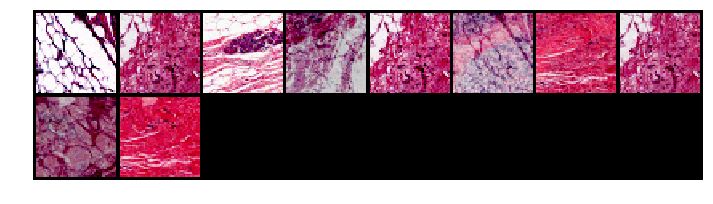

In [31]:
plt.figure(figsize = (12, 10))
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.axis('off')
plt.show()